# Start

# Importing packages

In [1]:
import pandas as pd
import os
from PIL import Image, ImageEnhance, ImageFilter

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import gensim.downloader as api
from transformers import AutoTokenizer, AutoModel
import torch
import tensorflow as tf
import tensorflow_hub as hub
from scipy.sparse import hstack
import pickle
#from tensorflow.keras.models import Model
# ou
from keras.models import Model


import cv2
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score
from keras.applications import VGG16, ResNet50, InceptionV3
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D,GlobalAveragePooling2D
import warnings
warnings.filterwarnings('ignore')

c:\Users\kamel\Documents\Openclassroom_projets\P6\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\kamel\Documents\Openclassroom_projets\P6\venv\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [2]:
# Configuration pour utiliser le GPU si disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Utilisation du device: {device}")

Utilisation du device: cuda


In [3]:
import tensorflow as tf
info = tf.sysconfig.get_build_info()
print("TF version   :", tf.__version__)
print("CUDA version :", info.get("cuda_version"))
print("cuDNN version:", info.get("cudnn_version"))

# Check if GPU is available
gpu_available = len(tf.config.list_physical_devices('GPU')) > 0
print(f"GPU available: {gpu_available}")

# Check if CPU is available  
cpu_available = len(tf.config.list_physical_devices('CPU')) > 0
print(f"CPU available: {cpu_available}")

# List all available devices
print("Available devices:")
for device in tf.config.list_physical_devices():
    print(f"  {device}")

TF version   : 2.19.1
CUDA version : None
cuDNN version: None
GPU available: False
CPU available: True
Available devices:
  PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


# Textual Data

## Textual Data Analyzing + feature engineering

In [4]:
df = pd.read_csv('../Dataset+projet+pretraitement+textes+images/Flipkart/flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


### Columns describe

Ce dataset contient des données de produits e-commerce provenant de Flipkart (un site de commerce électronique indien). Voici une explication détaillée de son contenu :

**Colonnes du dataset**

- **uniq_id** : Identifiant unique pour chaque produit (hash)
- **crawl_timestamp** : Date et heure de collecte des données (avril 2016)
- **product_url** : URL complète du produit sur Flipkart
- **product_name** : Nom du produit
- **product_category_tree** : Hiérarchie des catégories (format arbre)
- **pid** : Identifiant produit Flipkart
- **retail_price** : Prix de vente conseillé original
- **discounted_price** : Prix après réduction
- **image** : Nom du fichier image associé
- **is_FK_Advantage_product** : Booléen indiquant si c'est un produit "Flipkart Advantage"
- **description** : Description détaillée du produit avec caractéristiques
- **product_rating** : Note du produit (pas disponible dans cet échantillon)
- **overall_rating** : Note globale (pas disponible dans cet échantillon)
- **brand** : Marque du produit
- **product_specifications** : Spécifications techniques au format JSON

**Exemples de produits dans l'échantillon**

1. **Rideaux Elegance** : Rideaux polyester multicolores (prix original 1899₹, réduit à 899₹)
2. **Serviettes de bain Sathiyas** : Lot de 3 serviettes coton (600₹ → 449₹)
3. **Set de serviettes visage Eurospa** : 20 serviettes coton terry (prix non spécifié)


In [5]:
df.shape

(1050, 15)

In [6]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

The purpose here is to analyze the categories, so let check this column

### Category Column

In [7]:
print(df['product_category_tree'].value_counts())

product_category_tree
["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                         56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                           26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                                  23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                         22
["Home Furnishing >> Bath Linen >> Towels"]                                           19
                                                                                      ..
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Infinity India Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Ravishing Variety Ethnic"]     1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Pg handicrafts Ethnic"]        1
["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Homedesires Ethnic"]           1
["Watches >> Wrist Watches >> Petrol Wrist Watches"]                                   1

As we can see, the "product_category_tree" column contains detailed information on the complete taxonomy of the products, organized in a tree structure 

(for example: "Home Furnishing> > Curtains & Accessories> > Curtains").

We only need the main category so in the previous example we want to keep 'Home Furnishing'.

We will create a new column 'category' for this.

In [8]:
# Inspecter la structure des données de catégorie
print(df['product_category_tree'].iloc[0])

# Nettoyer et extraire la catégorie principale
def extract_main_category(category_tree):
    if pd.isna(category_tree):
        return "Unknown"

    # Supprimer les caractères [""] et diviser par >>
    try:
        # Enlever les crochets et guillemets
        clean_tree = category_tree.strip('[]"')
        # Diviser par >>
        categories = clean_tree.split(">>")
        # Prendre la première catégorie (niveau principal) et nettoyer les espaces
        main_category = categories[0].strip()
        return main_category
    except:
        return "Error"

# Extraire la catégorie principale
df['category'] = df['product_category_tree'].apply(extract_main_category)

# Afficher les catégories principales
print(df['category'].value_counts())

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64


Finally we have 7 balanced categories with 150 products each.

### Images column

We have something to resolve: in the images column 'image' the values represent the image's names, we want to associate the name of the image with the access path to directly access the images whose products are present in our dataset.

In [9]:
# Vérification du chemin des images
image_dir = "../Dataset+projet+pretraitement+textes+images/Flipkart/Images"
if not os.path.exists(image_dir):
    print(f"Dossier d'images introuvable. Veuillez vérifier le chemin: {image_dir}")
else:
    print(f"Dossier d'images trouvé: {image_dir}")

# Association des chemins d'images au DataFrame
df['image_path'] = df['image'].apply(lambda x: os.path.join(image_dir, x) if isinstance(x, str) else None)

# Vérification de l'existence des images
def check_image_exists(image_path):
    if image_path is None:
        return False
    return os.path.exists(image_path)

df['image_exists'] = df['image_path'].apply(check_image_exists)
print(f"Images trouvées: {df['image_exists'].sum()} sur {len(df)}")

Dossier d'images trouvé: ../Dataset+projet+pretraitement+textes+images/Flipkart/Images
Images trouvées: 1050 sur 1050


In [10]:
df['image_exists'].value_counts()

image_exists
True    1050
Name: count, dtype: int64

So all the products in the dataset have their respective images

## Textual Data treatement

- Nettoyage: suppression des caractères spéciaux, conversion en minuscules

- Traitement linguistique: Tokenization, suppression des stop words, lemmatisation

### Nettoyage

1. **Conversion en minuscules**

2. **Supression des URLs et HTML**

3. **Suppression des caractères spéciaux** - Garde seulement lettres, chiffres et espaces

4. **Normalisation des espaces** - Supprime les espaces multiples

In [11]:
# Download the necessary NLTK resources (to be done only once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kamel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kamel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\kamel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kamel\AppData\Roaming\nltk_data...
[nltk_data]   Package average

True

In [12]:
def clean_text(text):
    """
    Fonction complète de nettoyage du texte
    
    Args:
        text (str): Texte à nettoyer
    
    Returns:
        str: Texte nettoyé
    """
    if pd.isna(text) or text == "":
        return ""
    
    # 1. Conversion en minuscules
    text = text.lower()
    
    # 2. Suppression des URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 3. Suppression des caractères HTML
    text = re.sub(r'<.*?>', '', text)
    
    # 4. Suppression des caractères spéciaux et ponctuation
    # Garde seulement les lettres, chiffres et espaces
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    
    # 5. Suppression des chiffres (optionnel - décommentez si nécessaire)
    # text = re.sub(r'\d+', '', text)
    
    # 6. Suppression des espaces multiples
    text = re.sub(r'\s+', ' ', text)
    
    # 7. Suppression des espaces en début et fin
    text = text.strip()
    
    return text

### Traitement linguistique

1. **Tokenisation** - Divise le texte en mots individuels

2. **Suppression des mots courts** - Élimine les mots < 3 caractères

3. **Suppression des stop words** - Retire les mots vides (the, and, is...)

4. **Lemmatisation avec POS tagging** - Ramène les mots à leur forme canonique

In [13]:
# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Obtenir les stop words en anglais
stop_words = set(stopwords.words('english'))

def tokenize_and_process(text):
    """
    Tokenisation, suppression des stop words et lemmatisation
    
    Args:
        text (str): Texte nettoyé
    
    Returns:
        list: Liste des tokens traités
    """
    if not text:
        return []
    
    # 1. Tokenisation
    tokens = word_tokenize(text)
    
    # 2. Suppression des mots trop courts (< 3 caractères)
    tokens = [token for token in tokens if len(token) >= 3]
    
    # 3. Suppression des stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # 4. Lemmatisation avec POS tags
    lemmatized_tokens = []
    lemmatized_tokens = [lemmatizer.lemmatize(w) for w in tokens]
    
    return lemmatized_tokens

In [14]:
def process_text_complete(text):
    """
    Complete text processing pipeline = clean_text() + tokenize_and_process()
    
    Args:
        text (str): raw text
    
    Returns:
        tuple: (cleaned_text, tokens, processed_text)
    """
    # Nettoyage
    cleaned_text = clean_text(text)
    
    # Tokenisation et traitement
    tokens = tokenize_and_process(cleaned_text)
    
    # Rejoindre les tokens en texte
    processed_text = ' '.join(tokens)
    
    return cleaned_text, tokens, processed_text

In [15]:
# APPLY TO THE FLIPKART DATASET

# Processing of product descriptions
print("Traitement des descriptions de produits...")

# Textual columns to be processed
text_columns = ['product_name', 'description']

# Processing for each column
for col in text_columns:
    print(f"Traitement de la colonne: {col}")
    
    # Nettoyage
    df[f'{col}_cleaned'] = df[col].apply(clean_text)
    
    # Tokenisation et lemmatisation
    df[f'{col}_tokens'] = df[col].apply(lambda x: tokenize_and_process(clean_text(x)))
    
    # Texte traité (tokens rejoints)
    df[f'{col}_processed'] = df[f'{col}_tokens'].apply(lambda x: ' '.join(x)) # or use df[col].apply(process_text_complete) 
    

# Vérification des résultats
print("\n" + "="*50)
print("EXEMPLES DE TRAITEMENT")
print("="*50)


# Afficher quelques exemples
for i in range(3):
    print(f"\n--- EXEMPLE {i+1} ---")
    print(f"Nom original: {df['product_name'].iloc[i]}")
    print(f"Nom nettoyé: {df['product_name_cleaned'].iloc[i]}")
    print(f"Tokens: {df['product_name_tokens'].iloc[i][:10]}...")  # Premiers 10 tokens
    print(f"Texte traité: {df['product_name_processed'].iloc[i][:100]}...")  # Premiers 100 caractères
    
    print(f"\nDescription originale: {df['description'].iloc[i][:150]}...")
    print(f"Description nettoyée: {df['description_cleaned'].iloc[i][:150]}...")
    print(f"Description traitée: {df['description_processed'].iloc[i][:150]}...")

# Statistiques sur le nettoyage
print("\n" + "="*50)
print("STATISTIQUES DE NETTOYAGE")
print("="*50)

for col in text_columns:
    original_lengths = df[col].str.len()
    cleaned_lengths = df[f'{col}_cleaned'].str.len()
    processed_lengths = df[f'{col}_processed'].str.len()
    
    print(f"\n{col.upper()}:")
    print(f"  Longueur moyenne originale: {original_lengths.mean():.1f} caractères")
    print(f"  Longueur moyenne nettoyée: {cleaned_lengths.mean():.1f} caractères")
    print(f"  Longueur moyenne traitée: {processed_lengths.mean():.1f} caractères")
    print(f"  Nombre moyen de tokens: {df[f'{col}_tokens'].apply(len).mean():.1f}")

print("\nTraitement terminé ! Nouvelles colonnes créées:")
print("- product_name_cleaned, product_name_tokens, product_name_processed")
print("- description_cleaned, description_tokens, description_processed")

Traitement des descriptions de produits...
Traitement de la colonne: product_name
Traitement de la colonne: description

EXEMPLES DE TRAITEMENT

--- EXEMPLE 1 ---
Nom original: Elegance Polyester Multicolor Abstract Eyelet Door Curtain
Nom nettoyé: elegance polyester multicolor abstract eyelet door curtain
Tokens: ['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain']...
Texte traité: elegance polyester multicolor abstract eyelet door curtain...

Description originale: Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (...
Description nettoyée: key features of elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 2...
Description traitée: key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 

## Texutal Data features

- Bag-of-words (comptage simple)

- TF-IDF

- Word2Vec (embeddings classiques)

- une approche de type word/sentence embedding avec BERT

- une approche de type word/sentence embedding avec USE (Universal Sentence Encoder)

### Bag of words

In [41]:
def create_bow_features(texts, context_texts=None, max_features=1000, ngram_range=(1, 2), min_df=0.0, max_df=0.70):
    """
    Crée les features Bag-of-Words avec possibilité d'enrichir le vocabulaire
    via un corpus de contexte.

    Args:
        texts: Liste des textes principaux (ceux à vectoriser)
        context_texts: Liste de textes supplémentaires pour enrichir le vocabulaire
                       (par défaut: None = pas de contexte)
        max_features: Nombre maximum de features
        ngram_range: Plage des n-grammes (1,1) = unigrammes, (1,2) = uni+bigrammes

    Returns:
        features: np.array, textes principaux transformés en BoW
        vectorizer: objet CountVectorizer entraîné
    """
    vectorizer = CountVectorizer(
        max_features=max_features,
        ngram_range=ngram_range,
        lowercase=True,
        stop_words='english',
        min_df=min_df,
        max_df=max_df,  
    )

    # Si contexte fourni, on l'utilise pour construire le vocabulaire
    if context_texts is not None:
        combined_corpus = list(texts) + list(context_texts)
    else:
        combined_corpus = texts

    # Fit sur le corpus combiné
    vectorizer.fit(combined_corpus)

    # Transforme uniquement les textes cibles
    features = vectorizer.transform(texts).toarray()

    print(f"Shape des features BoW: {features.shape}")
    print(f"Exemple des mots les plus fréquents: {list(vectorizer.get_feature_names_out())[:10]}")

    return features, vectorizer


# Application sur les données
bow_name_features, bow_name_vectorizer = create_bow_features(
    df['product_name_processed'].fillna(''),
    df['description_processed'].fillna(''),
    max_features=15,
    ngram_range=(1, 2),  # unigrammes + bigrammes
    min_df=2,
    max_df=0.85  # ignorer les mots présents dans plus de 70% des documents
)

bow_desc_features, bow_desc_vectorizer = create_bow_features(
    df['description_processed'].fillna(''),
    df['product_name_processed'].fillna(''),  # contexte = noms de produits
    max_features=180,
    ngram_range=(1, 4),
    min_df=0.02,
    max_df=0.8
)

# Best results with (min_df=1, max_df=0.95, ngram_range=(1,2)(1,4), max_features=30, 100)
# Name: {'max_features': 15, 'ngram_range': (1, 2), 'min_df': 2, 'max_df': 0.85}
# Desc: {'max_features': 180, 'ngram_range': (1, 4), 'min_df': 0.02, 'max_df': 0.8}
# save generated features into csv files
pd.DataFrame(bow_name_features).to_csv("../data/text_features/BOW/bow_name_features.csv", index=False)
pd.DataFrame(bow_desc_features).to_csv("../data/text_features/BOW/bow_desc_features.csv", index=False)

Shape des features BoW: (1050, 15)
Exemple des mots les plus fréquents: ['buy', 'cash', 'cash delivery', 'day', 'delivery', 'free', 'free shipping', 'genuine', 'genuine product', 'mug']
Shape des features BoW: (1050, 180)
Exemple des mots les plus fréquents: ['abstract', 'analog', 'analog watch', 'analog watch men', 'analog watch woman', 'baby', 'baby boy', 'baby girl', 'battery', 'best']


### TF-IDF

In [49]:
def create_tfidf_features(texts, context_texts=None, max_features=1000, ngram_range=(1, 1), min_df=0.0, max_df=0.70):
    """
    Crée les features TF-IDF avec possibilité d'enrichir le vocabulaire
    via un corpus de contexte.

    Args:
        texts: Liste des textes principaux (ceux à vectoriser)
        context_texts: Liste de textes supplémentaires pour enrichir le vocabulaire
                       (par défaut: None = pas de contexte)
        max_features: Nombre maximum de features
        ngram_range: Plage des n-grammes (1,1) = unigrammes, (1,2) = uni+bigrammes

    Returns:
        features: np.array, textes principaux transformés en TF-IDF
        vectorizer: objet TfidfVectorizer entraîné
    """
    vectorizer = TfidfVectorizer(
        max_features=max_features,
        ngram_range=ngram_range,
        lowercase=True,
        stop_words='english',
        min_df=min_df,   # Ignore les mots qui apparaissent dans moins de N documents
        max_df=max_df# Ignore les mots qui apparaissent dans plus de % des documents
    )

    # Si contexte fourni, on l’utilise pour construire le vocabulaire
    if context_texts is not None:
        combined_corpus = list(texts) + list(context_texts)
    else:
        combined_corpus = texts

    # Fit sur le corpus combiné
    vectorizer.fit(combined_corpus)

    # Transforme uniquement les textes cibles
    features = vectorizer.transform(texts).toarray()

    print(f"Shape des features TF-IDF: {features.shape}")
    print(f"Exemple des mots les plus importants: {list(vectorizer.get_feature_names_out())[:10]}")

    return features, vectorizer


# Application sur les données
tfidf_name_features, tfidf_name_vectorizer = create_tfidf_features(
    df['product_name_processed'].fillna(''),
    df['description_processed'].fillna(''),
    max_features=110,
    ngram_range=(1, 2),
    min_df=1,
    max_df=0.85
)

tfidf_desc_features, tfidf_desc_vectorizer = create_tfidf_features(
    df['description_processed'].fillna(''),
    df['product_name_processed'].fillna(''), 
    max_features=210,
    ngram_range=(1,2),
    min_df=0.01,
    max_df=0.95
)



# save generated features into csv files
pd.DataFrame(tfidf_name_features).to_csv("../data/text_features/TF_IDF/tf_idf_name_features.csv", index=False)
pd.DataFrame(tfidf_desc_features).to_csv("../data/text_features/TF_IDF/tf_idf_desc_features.csv", index=False)

Shape des features TF-IDF: (1050, 110)
Exemple des mots les plus importants: ['adapter', 'analog', 'analog watch', 'baby', 'baby boy', 'baby girl', 'battery', 'best', 'best price', 'black']
Shape des features TF-IDF: (1050, 210)
Exemple des mots les plus importants: ['100', 'abstract', 'adapter', 'additional', 'analog', 'analog watch', 'art', 'baby', 'baby boy', 'baby girl']


### Word2VEC

In [18]:
def create_word2vec_features(tokenized_texts, context_tokenized_texts=None, 
                             vector_size=150, window=8, min_count=2):
    """
    Crée les features Word2Vec avec enrichissement possible du corpus d'entraînement
    
    Args:
        tokenized_texts: Liste de listes de tokens (textes principaux)
        context_tokenized_texts: Liste de listes de tokens pour enrichir le vocabulaire
                                (par défaut: None = pas de contexte)
        vector_size: Dimension des vecteurs
        window: Taille de la fenêtre contextuelle
        min_count: Fréquence minimale des mots
    
    Returns:
        features: np.array des features moyennées pour les textes principaux
        model: modèle Word2Vec entraîné
    """
    # Filtrer les textes vides
    valid_texts = [tokens for tokens in tokenized_texts if len(tokens) > 0]
    
    # Combiner avec le contexte si fourni
    if context_tokenized_texts is not None:
        valid_context = [tokens for tokens in context_tokenized_texts if len(tokens) > 0]
        training_corpus = valid_texts + valid_context
        print(f"Entraînement sur {len(training_corpus)} textes (dont {len(valid_context)} de contexte)")
    else:
        training_corpus = valid_texts
        print(f"Entraînement sur {len(training_corpus)} textes")
    
    # Entraîner le modèle sur le corpus enrichi
    model = Word2Vec(
        sentences=training_corpus,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        workers=4,
        sg=1,
        negative=10,
        epochs=30
    )
    
    # Créer les features UNIQUEMENT pour les textes principaux
    features = []
    for tokens in tokenized_texts:
        if len(tokens) == 0:
            features.append(np.zeros(vector_size))
        else:
            word_vectors = [model.wv[token] for token in tokens if token in model.wv]
            if len(word_vectors) > 0:
                features.append(np.mean(word_vectors, axis=0))
            else:
                features.append(np.zeros(vector_size))
    
    features = np.array(features)
    print(f"Shape des features Word2Vec: {features.shape}")
    print(f"Vocabulaire du modèle: {len(model.wv)} mots")
    
    return features, model

# Application sur les données
print("names_features" + "="*20)
w2v_name_features, w2v_name_model = create_word2vec_features(
    df['product_name_tokens'],
    vector_size=150
)

print("desc_features" + "="*20)
w2v_desc_features, w2v_desc_model = create_word2vec_features(
    tokenized_texts=df['description_tokens'],
    context_tokenized_texts=df['product_name_tokens'],  # Utiliser les noms comme contexte
    vector_size=150
)

# Best results with (vector_size=150, window=8, min_count=2, sg=1, negative=10, epochs=30)

# save generated features into csv files
pd.DataFrame(w2v_name_features).to_csv("../data/text_features/WORD2VEC/word2vec_name_features.csv", index=False)
pd.DataFrame(w2v_desc_features).to_csv("../data/text_features/WORD2VEC/word2vec_desc_features.csv", index=False)


names_features====================
Entraînement sur 1050 textes
Shape des features Word2Vec: (1050, 150)
Vocabulaire du modèle: 698 mots
desc_features====================
Entraînement sur 2100 textes (dont 1050 de contexte)
Shape des features Word2Vec: (1050, 150)
Vocabulaire du modèle: 3985 mots


### BERT

In [19]:
%pip install -U sentence-transformers huggingface_hub[hf_xet] --quiet

zsh:1: no matches found: huggingface_hub[hf_xet]
Note: you may need to restart the kernel to use updated packages.


In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def create_distilbert_features(texts, model_name='distilbert-base-uncased', 
                               max_length=512, batch_size=32, 
                               pooling_strategy='mean',  # AJOUT ICI
                               save_path=None):
    """
    Crée les features avec DistilBERT
    Args:
        pooling_strategy: 'cls' (token [CLS]) ou 'mean' (moyenne des tokens)
    """
    print(f"Chargement du modèle DistilBERT: {model_name}")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name).to(device)
    model.eval()

    features = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        
        inputs = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        ).to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            
            # MODIFICATION ICI - Choisir la stratégie
            if pooling_strategy == 'mean':
                # Mean pooling
                attention_mask = inputs['attention_mask']
                masked_output = outputs.last_hidden_state * attention_mask.unsqueeze(-1)
                sum_embeddings = masked_output.sum(1)
                sum_mask = attention_mask.sum(1, keepdim=True)
                batch_features = (sum_embeddings / sum_mask).cpu().numpy()
            else:  # 'cls'
                # Token [CLS] (méthode originale)
                batch_features = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            
            features.extend(batch_features)

    features = np.array(features)

    # Sauvegarde
    if save_path:
        if save_path.endswith(".npy"):
            np.save(save_path, features)
        elif save_path.endswith(".csv"):
            pd.DataFrame(features).to_csv(save_path, index=False)
        print(f"Features sauvegardées dans {save_path}")
    return features

# ==== Application sur tes données ====

print("Extraction des features DistilBERT pour les noms de produits...")
distilbert_name_features = create_distilbert_features(
    df['product_name_processed'].fillna('').tolist(),
    batch_size=32,
    save_path="../data/text_features/BERT/distilbert_name_features.csv"   # ou .csv
)

print("Extraction des features DistilBERT pour les descriptions...")
distilbert_desc_features = create_distilbert_features(
    df['description_processed'].fillna('').tolist(),
    batch_size=32,
    save_path="../data/text_features/BERT/distilbert_desc_features.csv"   # ou .csv
)

Extraction des features DistilBERT pour les noms de produits...
Chargement du modèle DistilBERT: distilbert-base-uncased
Features sauvegardées dans ../data/text_features/BERT/distilbert_name_features.csv
Extraction des features DistilBERT pour les descriptions...
Chargement du modèle DistilBERT: distilbert-base-uncased
Features sauvegardées dans ../data/text_features/BERT/distilbert_desc_features.csv


### USE (Universal Sentence Encoder)

In [22]:
def create_use_features(texts, context_texts=None, context_strategy='concat'):
    """
    Crée les features Universal Sentence Encoder avec contexte optionnel
    
    Args:
        texts: Liste des textes principaux
        context_texts: Liste de textes de contexte (même longueur que texts ou None)
        context_strategy: 'concat' pour concaténer, 'average' pour moyenner
    
    Returns:
        features
    """
    print("Chargement du modèle Universal Sentence Encoder...")
    model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
    embed = hub.load(model_url)
    
    print(f"Extraction des embeddings pour {len(texts)} textes...")
    
    batch_size = 100
    features = []
    
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        
        if context_texts is not None and context_strategy == 'concat':
            batch_context = context_texts[i:i+batch_size]
            batch_combined = [f"{ctx}. {txt}" for ctx, txt in zip(batch_context, batch_texts)]
            batch_embeddings = embed(batch_combined).numpy()
        elif context_texts is not None and context_strategy == 'average':
            batch_embeddings = embed(batch_texts).numpy()
            batch_context = context_texts[i:i+batch_size]
            context_embeddings = embed(batch_context).numpy()
            batch_embeddings = 0.7 * batch_embeddings + 0.3 * context_embeddings
        else:
            batch_embeddings = embed(batch_texts).numpy()
        
        features.extend(batch_embeddings)
        
        if (i // batch_size + 1) % 5 == 0:
            print(f"Traité {min(i + batch_size, len(texts))}/{len(texts)} textes")
    
    features = np.array(features)
    print(f"Shape des features USE: {features.shape}")
    
    return features

# Application sur les données
print("Extraction des features USE pour les noms de produits...")
use_name_features = create_use_features(
    df['product_name_processed'].fillna('').tolist()
)

print("Extraction des features USE pour les descriptions...")
use_desc_features = create_use_features(
    texts=df['description_processed'].fillna('').str[:300].tolist(),
    context_texts=df['product_name_processed'].fillna('').tolist(),
    context_strategy='concat'
)

# save generated features into csv files
pd.DataFrame(use_name_features).to_csv("../data/text_features/USE/use_name_features.csv", index=False)
pd.DataFrame(use_desc_features).to_csv("../data/text_features/USE/use_desc_features.csv", index=False)


Extraction des features USE pour les noms de produits...
Chargement du modèle Universal Sentence Encoder...
Extraction des embeddings pour 1050 textes...
Traité 500/1050 textes
Traité 1000/1050 textes
Shape des features USE: (1050, 512)
Extraction des features USE pour les descriptions...
Chargement du modèle Universal Sentence Encoder...
Extraction des embeddings pour 1050 textes...
Traité 500/1050 textes
Traité 1000/1050 textes
Shape des features USE: (1050, 512)


## Texutal Data features visualisation

In [50]:
# Configuration pour de meilleurs graphiques
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

def load_and_prepare_features():
    """
    Charge toutes les features textuelles et les prépare pour t-SNE
    """
    print("Chargement des features textuelles...")
    
    # Charger les données principales avec les catégories
    df = pd.read_csv('../Dataset+projet+pretraitement+textes+images/Flipkart/flipkart_com-ecommerce_sample_1050.csv')
    
    # Extraire les catégories principales comme dans votre notebook
    def extract_main_category(category_tree):
        if pd.isna(category_tree):
            return "Unknown"
        try:
            clean_tree = category_tree.strip('[]"')
            categories = clean_tree.split(">>")
            main_category = categories[0].strip()
            return main_category
        except:
            return "Error"

    df['category'] = df['product_category_tree'].apply(extract_main_category)
    categories = df['category'].values

    # Dictionnaire pour stocker toutes les features
    features_dict = {}

    # 1. Bag of Words
    try:
        bow_name = pd.read_csv("../data/text_features/BOW/bow_name_features.csv").values
        bow_desc = pd.read_csv("../data/text_features/BOW/bow_desc_features.csv").values
        # Concaténer name et description features
        bow_combined = np.hstack([bow_name, bow_desc])
        features_dict['BoW (Name + Desc)'] = bow_combined
        print(f"✓ BoW chargé: {bow_combined.shape}")
    except Exception as e:
        print(f"✗ Erreur BoW: {e}")
    
    # 2. TF-IDF
    try:
        tfidf_name = pd.read_csv("../data/text_features/TF_IDF/tf_idf_name_features.csv").values
        tfidf_desc = pd.read_csv("../data/text_features/TF_IDF/tf_idf_desc_features.csv").values
        tfidf_combined = np.hstack([tfidf_name, tfidf_desc])
        features_dict['TF-IDF (Name + Desc)'] = tfidf_combined
        print(f"✓ TF-IDF chargé: {tfidf_combined.shape}")
    except Exception as e:
        print(f"✗ Erreur TF-IDF: {e}")
    
    # 3. Word2Vec
    try:
        w2v_name = pd.read_csv("../data/text_features/WORD2VEC/word2vec_name_features.csv").values
        w2v_desc = pd.read_csv("../data/text_features/WORD2VEC/word2vec_desc_features.csv").values
        w2v_combined = np.hstack([w2v_name, w2v_desc])
        features_dict['Word2Vec (Name + Desc)'] = w2v_combined
        print(f"✓ Word2Vec chargé: {w2v_combined.shape}")
    except Exception as e:
        print(f"✗ Erreur Word2Vec: {e}")
    
    # 4. BERT (DistilBERT) 
    try:
        bert_name = pd.read_csv("../data/text_features/BERT/distilbert_name_features.csv").values
        bert_desc = pd.read_csv("../data/text_features/BERT/distilbert_desc_features.csv").values
        bert_combined = np.hstack([bert_name, bert_desc])
        features_dict['BERT (Name + Desc)'] = bert_combined
        #
        bert_categories = categories
        print(f"✓ BERT chargé: {bert_combined.shape}")
    except Exception as e:
        print(f"✗ Erreur BERT: {e}")
        bert_categories = None
    
    # 5. USE (Universal Sentence Encoder)
    try:
        use_name = pd.read_csv("../data/text_features/USE/use_name_features.csv").values
        use_desc = pd.read_csv("../data/text_features/USE/use_desc_features.csv").values
        use_combined = np.hstack([use_name, use_desc])
        features_dict['USE (Name + Desc)'] = use_combined
        print(f"✓ USE chargé: {use_combined.shape}")
    except Exception as e:
        print(f"✗ Erreur USE: {e}")
    
    return features_dict, categories, bert_categories


def apply_tsne_and_plot(features_dict, categories, bert_categories=None):
    """
    Applique t-SNE à toutes les features et crée des visualisations
    """
    # Définir une palette de couleurs pour les catégories
    unique_categories = np.unique(categories)
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_categories)))
    category_colors = {cat: colors[i] for i, cat in enumerate(unique_categories)}
    
    # Calculer le nombre de sous-graphiques nécessaires
    n_features = len(features_dict)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    # Créer la figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    if n_features == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    tsne_results = {}
    
    for idx, (feature_name, features) in enumerate(features_dict.items()):
        print(f"\nTraitement de {feature_name}...")
        
        # Utiliser les bonnes catégories pour BERT
        if 'BERT' in feature_name and bert_categories is not None:
            current_categories = bert_categories
        else:
            current_categories = categories[:len(features)]
        
        # Normalisation des features pour t-SNE (recommandé pour certains types)
        if feature_name.startswith(('BoW', 'TF-IDF')):
            # Pour les features sparse, on peut normaliser
            scaler = StandardScaler(with_mean=False)  # with_mean=False pour les matrices sparse
            features_scaled = features
        else:
            # Pour les embeddings denses
            scaler = StandardScaler()
            features_scaled = scaler.fit_transform(features)
        
        # Réduire la dimensionalité si nécessaire avant t-SNE
        if features_scaled.shape[1] > 50:
            print(f"  Réduction préalable de {features_scaled.shape[1]} à 50 dimensions avec PCA...")
            from sklearn.decomposition import PCA
            pca = PCA(n_components=50, random_state=42)
            features_scaled = pca.fit_transform(features_scaled)
        
        # Appliquer t-SNE
        print(f"  Application de t-SNE sur {features_scaled.shape}...")
        tsne = TSNE(
            n_components=2,
            random_state=42,
            perplexity=min(30, len(features_scaled)//4),  # Ajuster perplexity selon la taille
            max_iter=1000,
            verbose=0
        )
        
        tsne_result = tsne.fit_transform(features_scaled)
        tsne_results[feature_name] = tsne_result
        
        # Créer le graphique
        ax = axes[idx]
        
        # Scatter plot avec couleurs par catégorie
        for category in unique_categories:
            if category in current_categories:
                mask = current_categories == category
                if np.any(mask):
                    ax.scatter(
                        tsne_result[mask, 0], 
                        tsne_result[mask, 1],
                        c=[category_colors[category]], 
                        label=category,
                        alpha=0.7,
                        s=50
                    )
        
        ax.set_title(f't-SNE: {feature_name}', fontsize=12, fontweight='bold')
        ax.set_xlabel('t-SNE 1')
        ax.set_ylabel('t-SNE 2')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        ax.grid(True, alpha=0.3)
    
    # Cacher les axes inutilisés
    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Visualisation t-SNE des Features Textuelles par Catégorie', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    return tsne_results


def create_comparison_plot(tsne_results, categories, bert_categories=None):
    """
    Crée un graphique de comparaison avec toutes les méthodes
    """
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    # Couleurs pour les catégories
    unique_categories = np.unique(categories)
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_categories)))
    category_colors = {cat: colors[i] for i, cat in enumerate(unique_categories)}
    
    for idx, (feature_name, tsne_result) in enumerate(tsne_results.items()):
        if idx >= 6:  # Limite à 6 graphiques
            break
        
        ax = axes[idx]
        
        # Utiliser les bonnes catégories
        if 'BERT' in feature_name and bert_categories is not None:
            current_categories = bert_categories
        else:
            current_categories = categories[:len(tsne_result)]
        
        # Plot
        for category in unique_categories:
            if category in current_categories:
                mask = current_categories == category
                if np.any(mask):
                    ax.scatter(
                        tsne_result[mask, 0], 
                        tsne_result[mask, 1],
                        c=[category_colors[category]], 
                        label=category,
                        alpha=0.8,
                        s=60
                    )
        
        ax.set_title(feature_name, fontsize=14, fontweight='bold')
        ax.set_xlabel('t-SNE 1')
        ax.set_ylabel('t-SNE 2')
        ax.grid(True, alpha=0.3)
    
    # Légende commune
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15, 0.5), 
               fontsize=12, title='Catégories', title_fontsize=14)
    
    # Cacher les axes inutilisés
    for idx in range(len(tsne_results), 6):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Comparaison des Méthodes de Features Textuelles avec t-SNE', 
                 fontsize=18, fontweight='bold', y=0.98)
    plt.show()



def analyze_clusters(tsne_results, categories, bert_categories=None):
    """
    Analyse la qualité des clusters pour chaque méthode
    """
    from sklearn.metrics import silhouette_score
    from sklearn.preprocessing import LabelEncoder
    
    print("\n" + "="*60)
    print("ANALYSE DE LA QUALITÉ DES CLUSTERS")
    print("="*60)
    
    le = LabelEncoder()
    
    results_analysis = {}
    
    for feature_name, tsne_result in tsne_results.items():
        print(f"\n{feature_name}:")
        print("-" * len(feature_name))
        
        # Utiliser les bonnes catégories
        if 'BERT' in feature_name and bert_categories is not None:
            current_categories = bert_categories
        else:
            current_categories = categories[:len(tsne_result)]
        
        # Encoder les catégories
        encoded_categories = le.fit_transform(current_categories)
        
        # Calculer le score de silhouette
        silhouette_avg = silhouette_score(tsne_result, encoded_categories)
        
        # Calculer la séparation inter-classes
        unique_cats = np.unique(current_categories)
        inter_class_distances = []
        
        for i, cat1 in enumerate(unique_cats):
            for cat2 in unique_cats[i+1:]:
                mask1 = current_categories == cat1
                mask2 = current_categories == cat2
                
                center1 = np.mean(tsne_result[mask1], axis=0)
                center2 = np.mean(tsne_result[mask2], axis=0)
                
                distance = np.linalg.norm(center1 - center2)
                inter_class_distances.append(distance)
        
        avg_inter_distance = np.mean(inter_class_distances)
        
        print(f"  Score de Silhouette: {silhouette_avg:.3f}")
        print(f"  Distance inter-classe moyenne: {avg_inter_distance:.3f}")
        print(f"  Nombre d'échantillons: {len(tsne_result)}")
        
        results_analysis[feature_name] = {
            'silhouette': silhouette_avg,
            'inter_distance': avg_inter_distance,
            'n_samples': len(tsne_result)
        }
    
    # Créer un graphique de comparaison des métriques
    methods = list(results_analysis.keys())
    silhouette_scores = [results_analysis[m]['silhouette'] for m in methods]
    inter_distances = [results_analysis[m]['inter_distance'] for m in methods]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Score de silhouette
    bars1 = ax1.bar(methods, silhouette_scores, color='skyblue', alpha=0.7)
    ax1.set_title('Score de Silhouette par Méthode', fontweight='bold')
    ax1.set_ylabel('Score de Silhouette')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for bar, score in zip(bars1, silhouette_scores):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{score:.3f}', ha='center', va='bottom')
    
    # Distance inter-classe
    bars2 = ax2.bar(methods, inter_distances, color='lightcoral', alpha=0.7)
    ax2.set_title('Distance Inter-Classe Moyenne', fontweight='bold')
    ax2.set_ylabel('Distance Moyenne')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for bar, distance in zip(bars2, inter_distances):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{distance:.1f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return results_analysis




### Run

Chargement des features textuelles...
✓ BoW chargé: (1050, 195)
✓ TF-IDF chargé: (1050, 320)
✓ Word2Vec chargé: (1050, 300)
✓ BERT chargé: (1050, 1536)
✓ USE chargé: (1050, 1024)

✅ 5 types de features chargées avec succès!

🔄 Application de t-SNE...

Traitement de BoW (Name + Desc)...
  Réduction préalable de 195 à 50 dimensions avec PCA...
  Application de t-SNE sur (1050, 50)...

Traitement de TF-IDF (Name + Desc)...
  Réduction préalable de 320 à 50 dimensions avec PCA...
  Application de t-SNE sur (1050, 50)...

Traitement de Word2Vec (Name + Desc)...
  Réduction préalable de 300 à 50 dimensions avec PCA...
  Application de t-SNE sur (1050, 50)...

Traitement de BERT (Name + Desc)...
  Réduction préalable de 1536 à 50 dimensions avec PCA...
  Application de t-SNE sur (1050, 50)...

Traitement de USE (Name + Desc)...
  Réduction préalable de 1024 à 50 dimensions avec PCA...
  Application de t-SNE sur (1050, 50)...


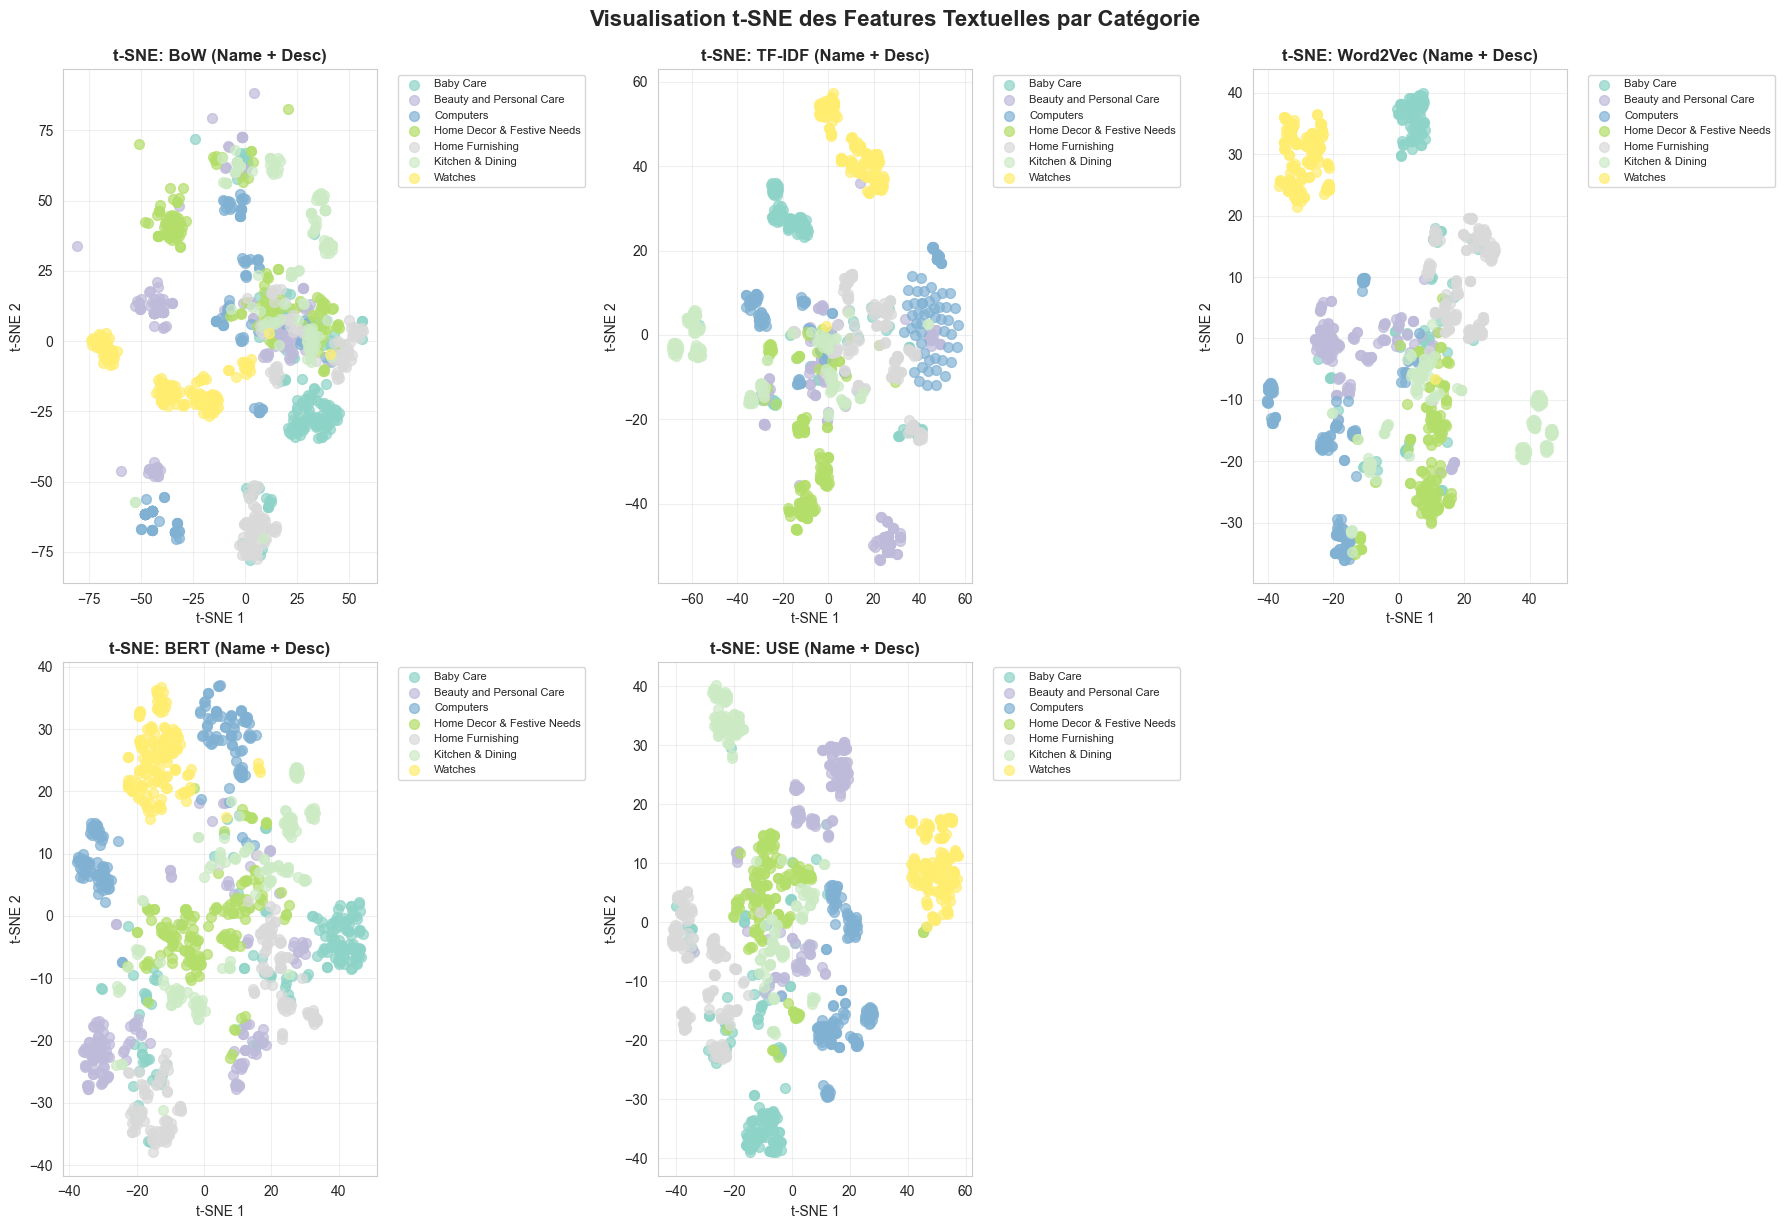


📊 Création du graphique de comparaison...


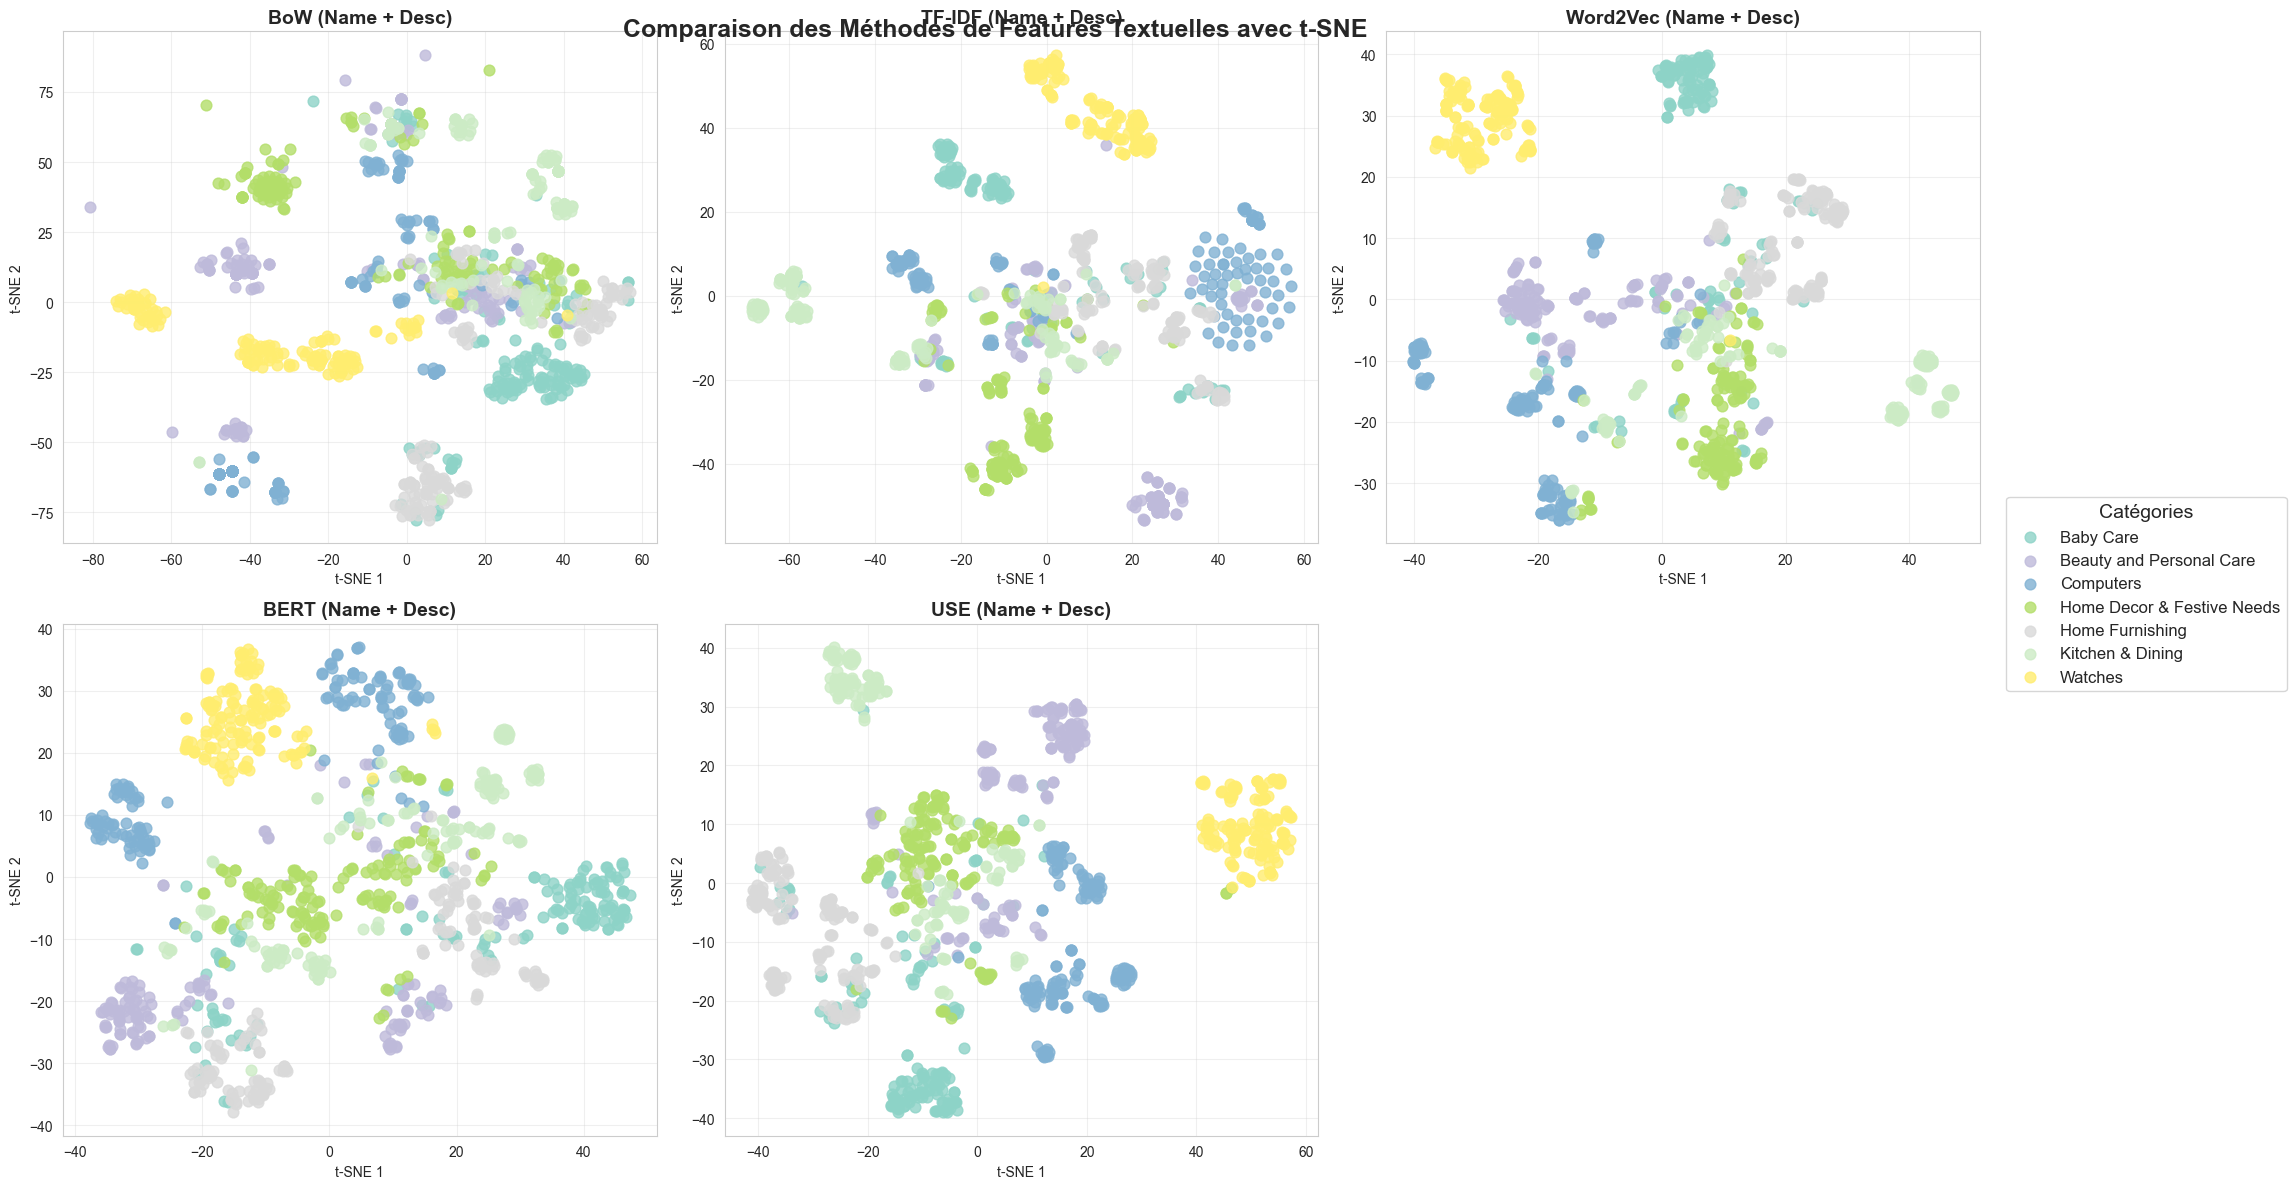


🔍 Analyse de la qualité des clusters...

ANALYSE DE LA QUALITÉ DES CLUSTERS

BoW (Name + Desc):
-----------------
  Score de Silhouette: 0.044
  Distance inter-classe moyenne: 47.101
  Nombre d'échantillons: 1050

TF-IDF (Name + Desc):
--------------------
  Score de Silhouette: 0.152
  Distance inter-classe moyenne: 40.221
  Nombre d'échantillons: 1050

Word2Vec (Name + Desc):
----------------------
  Score de Silhouette: 0.292
  Distance inter-classe moyenne: 36.538
  Nombre d'échantillons: 1050

BERT (Name + Desc):
------------------
  Score de Silhouette: 0.097
  Distance inter-classe moyenne: 27.749
  Nombre d'échantillons: 1050

USE (Name + Desc):
-----------------
  Score de Silhouette: 0.319
  Distance inter-classe moyenne: 39.063
  Nombre d'échantillons: 1050


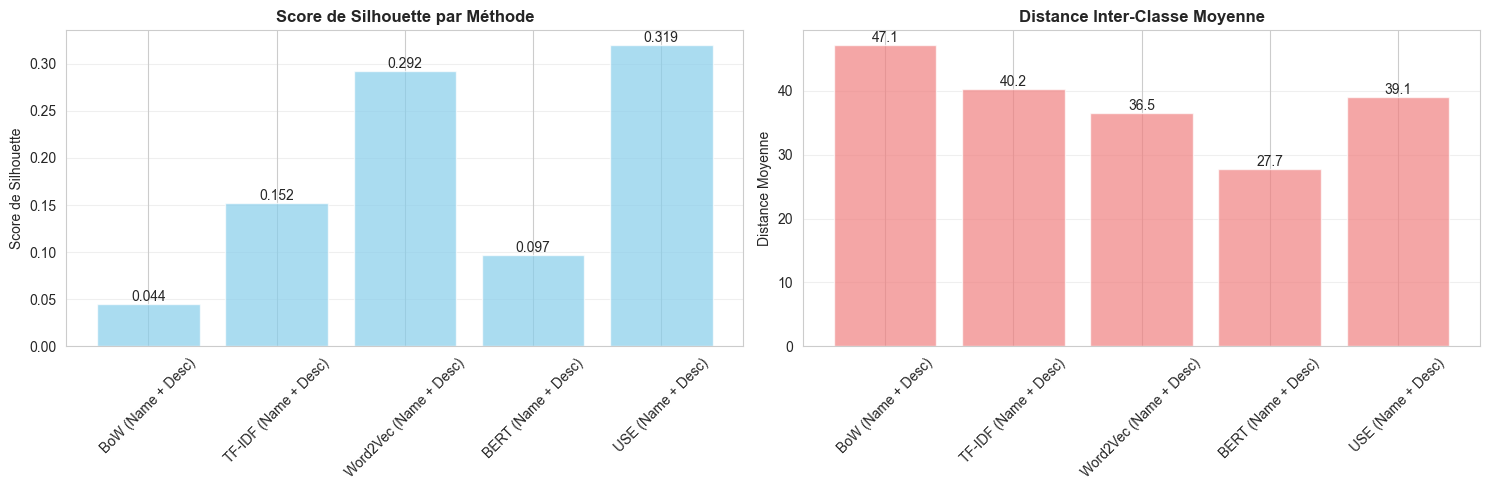


✅ VISUALISATION TERMINÉE AVEC SUCCÈS!


In [51]:
# 1. Charger les features
features_dict, categories, bert_categories = load_and_prepare_features()
    
if not features_dict:
    print("❌ Aucune feature n'a pu être chargée. Vérifiez les chemins des fichiers.")
else:
    print(f"\n✅ {len(features_dict)} types de features chargées avec succès!")
        
    # 2. Appliquer t-SNE et créer les visualisations
    print("\n🔄 Application de t-SNE...")
    tsne_results = apply_tsne_and_plot(features_dict, categories, bert_categories)
        
    # 3. Créer un graphique de comparaison
    print("\n📊 Création du graphique de comparaison...")
    create_comparison_plot(tsne_results, categories, bert_categories)
        
    # 4. Analyser la qualité des clusters
    print("\n🔍 Analyse de la qualité des clusters...")
    analysis_results = analyze_clusters(tsne_results, categories, bert_categories)
        
    print("\n" + "="*70)
    print("✅ VISUALISATION TERMINÉE AVEC SUCCÈS!")
    print("="*70)

## Evaluate Data features

Evaluer quantitativement les différentes méthodes d'extraction de caractéristiques que nous avons implémentées. Je veux voir 2  fonctions d'évaluation :

evaluate_clustering qui applique une réduction de dimension préalable via PCA pour les caractéristiques de haute dimension.
evaluate_clustering_no_reduction qui conserve toutes les dimensions d'origine.

Pour chaque méthode, standardiser les caractéristiques, appliquer l'algorithme K-means avec K=7, puis mesurons la qualité du clustering faite avec les 2 fonctions d'évaluation  avec deux métriques complémentaires :

Adjusted Rand Index (ARI) qui évalue la correspondance avec les catégories réelles
Score de Silhouette qui mesure la cohésion interne des clusters.

In [52]:
def create_comparison_histogram(results_pca, results_no_pca):
    """
    Crée un histogramme de comparaison pour ARI uniquement
    
    Args:
        results_pca: DataFrame avec les résultats PCA
        results_no_pca: DataFrame avec les résultats sans PCA
    
    Returns:
        fig: Figure matplotlib de l'histogramme
    """
    # Préparer les données
    methods = results_pca['Method'].tolist()
    ari_with_pca = results_pca['ARI_Score'].tolist()
    ari_no_reduction = results_no_pca['ARI_Score'].tolist()
    
    # Configuration de la position des barres
    x = np.arange(len(methods))
    width = 0.35
    
    # Créer la figure et l'axe
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Créer les barres
    bars1 = ax.bar(x - width/2, ari_with_pca, width, 
                   label='ARI avec PCA', color='skyblue', alpha=0.8)
    bars2 = ax.bar(x + width/2, ari_no_reduction, width,
                   label='ARI sans réduction', color='lightcoral', alpha=0.8)
    
    # Ajouter les valeurs sur les barres
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9)
    
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9)
    
    # Configuration du graphique
    ax.set_xlabel('Méthodes', fontsize=12)
    ax.set_ylabel('ARI Score', fontsize=12)
    ax.set_title('Comparaison ARI: Avec PCA vs Sans Réduction', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(methods, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    
    return fig

### With PCA

In [53]:
def evaluate_clustering(features_dict, true_labels, n_clusters=7, pca_components=50, 
                       random_state=42, verbose=True):
    """
    Évalue les méthodes de clustering avec réduction PCA préalable
    
    Args:
        features_dict (dict): Dictionnaire des features {nom: array}
        true_labels (array): Vraies étiquettes de catégories
        n_clusters (int): Nombre de clusters pour K-means
        pca_components (int): Nombre de composantes PCA
        random_state (int): Graine aléatoire
        verbose (bool): Affichage détaillé
    
    Returns:
        pd.DataFrame: Résultats d'évaluation
    """
    results = []
    
    if verbose:
        print("="*60)
        print("🔍 ÉVALUATION AVEC RÉDUCTION PCA")
        print("="*60)
    
    for method_name, features in features_dict.items():
        if verbose:
            print(f"\n📊 Traitement: {method_name}")
            print(f"   Dimensions originales: {features.shape}")
        
        try:
            # 1. Standardisation des features
            scaler = StandardScaler()
            features_scaled = scaler.fit_transform(features)
            
            # 2. Réduction PCA si nécessaire
            if features_scaled.shape[1] > pca_components:
                if verbose:
                    print(f"   → Réduction PCA: {features_scaled.shape[1]} → {pca_components} dimensions")
                pca = PCA(n_components=pca_components, random_state=random_state)
                features_final = pca.fit_transform(features_scaled)
                variance_explained = pca.explained_variance_ratio_.sum()
            else:
                if verbose:
                    print(f"   → Pas de réduction nécessaire ({features_scaled.shape[1]} ≤ {pca_components})")
                features_final = features_scaled
                variance_explained = 1.0
            
            # 3. Clustering K-means
            kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
            cluster_labels = kmeans.fit_predict(features_final)
            
            # 4. Calcul de l'ARI
            ari_score = adjusted_rand_score(true_labels, cluster_labels)
            
            # 5. Stockage des résultats
            result = {
                'Method': method_name,
                'Original_Dims': features.shape[1],
                'Final_Dims': features_final.shape[1],
                'Variance_Explained': variance_explained,
                'ARI_Score': ari_score,
                'Inertia': kmeans.inertia_
            }
            results.append(result)
            
            if verbose:
                print(f"   ✅ ARI: {ari_score:.4f}")
                print(f"      Variance expliquée: {variance_explained:.1%}")
                
        except Exception as e:
            if verbose:
                print(f"   ❌ Erreur: {e}")
            
            result = {
                'Method': method_name,
                'Original_Dims': features.shape[1],
                'Final_Dims': 'Error',
                'Variance_Explained': 'Error',
                'ARI_Score': np.nan,
                'Inertia': np.nan
            }
            results.append(result)
    
    # Créer le DataFrame des résultats
    results_df = pd.DataFrame(results)
    
    return results_df

### Without PCA

In [54]:
def evaluate_clustering_no_reduction(features_dict, true_labels, n_clusters=7, 
                                    random_state=42, verbose=True):
    """
    Évalue les méthodes de clustering sans réduction dimensionnelle
    
    Args:
        features_dict (dict): Dictionnaire des features {nom: array}
        true_labels (array): Vraies étiquettes de catégories
        n_clusters (int): Nombre de clusters pour K-means
        random_state (int): Graine aléatoire
        verbose (bool): Affichage détaillé
    
    Returns:
        pd.DataFrame: Résultats d'évaluation
    """
    results = []

    if verbose:
        print("="*60)
        print("🔍 ÉVALUATION SANS RÉDUCTION DIMENSIONNELLE")
        print("="*60)

    for method_name, features in features_dict.items():
        if verbose:
            print(f"\n📊 Traitement: {method_name}")
            print(f"   Dimensions: {features.shape}")
        
        try:
            # 1. Standardisation des features
            scaler = StandardScaler()
            features_scaled = scaler.fit_transform(features)
            
            # 2. Clustering K-means directement sur toutes les dimensions
            kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
            cluster_labels = kmeans.fit_predict(features_scaled)
            
            # 3. Calcul de l'ARI
            ari_score = adjusted_rand_score(true_labels, cluster_labels)
            
            # 4. Stockage des résultats
            result = {
                'Method': method_name,
                'Dimensions': features.shape[1],
                'ARI_Score': ari_score,
                'Inertia': kmeans.inertia_
            }
            results.append(result)
            
            if verbose:
                print(f"   ✅ ARI: {ari_score:.4f}")
                
        except Exception as e:
            if verbose:
                print(f"   ❌ Erreur: {e}")
            
            result = {
                'Method': method_name,
                'Dimensions': features.shape[1],
                'ARI_Score': np.nan,
                'Inertia': np.nan
            }
            results.append(result)
    
    # Créer le DataFrame des résultats
    results_df = pd.DataFrame(results)
    
    return results_df

In [55]:
def run_complete_evaluation(features_dict, true_labels, n_clusters=7, pca_components=50):
    """
    Lance l'évaluation complète avec focus sur ARI uniquement
    """
    print("🚀 DÉMARRAGE DE L'ÉVALUATION COMPLÈTE - ARI FOCUS")
    print("="*80)
    
    # 1. Évaluation avec PCA
    results_pca = evaluate_clustering(
        features_dict, true_labels, n_clusters, pca_components, verbose=True
    )
    
    # 2. Évaluation sans réduction
    results_no_pca = evaluate_clustering_no_reduction(
        features_dict, true_labels, n_clusters, verbose=True
    )
    
    # 3. Comparaison détaillée
    print("\n" + "="*80)
    print("🔍 ANALYSE COMPARATIVE DÉTAILLÉE - ARI")
    print("="*80)
    
    fig = create_comparison_histogram(results_pca, results_no_pca)
    plt.show()

    
    # 4. Conclusions
    print(f"\n🎯 CONCLUSIONS:")
    print(f"   • Meilleur ARI (avec PCA):      {results_pca.loc[results_pca['ARI_Score'].idxmax(), 'Method']} ({results_pca['ARI_Score'].max():.4f})")
    print(f"   • Meilleur ARI (sans réduction): {results_no_pca.loc[results_no_pca['ARI_Score'].idxmax(), 'Method']} ({results_no_pca['ARI_Score'].max():.4f})")
    
    return results_pca, results_no_pca, fig

### Comparison

🚀 DÉMARRAGE DE L'ÉVALUATION COMPLÈTE - ARI FOCUS
🔍 ÉVALUATION AVEC RÉDUCTION PCA

📊 Traitement: BoW (Name + Desc)
   Dimensions originales: (1050, 195)
   → Réduction PCA: 195 → 50 dimensions
   ✅ ARI: 0.2760
      Variance expliquée: 90.1%

📊 Traitement: TF-IDF (Name + Desc)
   Dimensions originales: (1050, 320)
   → Réduction PCA: 320 → 50 dimensions
   ✅ ARI: 0.2748
      Variance expliquée: 72.1%

📊 Traitement: Word2Vec (Name + Desc)
   Dimensions originales: (1050, 300)
   → Réduction PCA: 300 → 50 dimensions
   ✅ ARI: 0.4328
      Variance expliquée: 95.3%

📊 Traitement: BERT (Name + Desc)
   Dimensions originales: (1050, 1536)
   → Réduction PCA: 1536 → 50 dimensions
   ✅ ARI: 0.3049
      Variance expliquée: 74.0%

📊 Traitement: USE (Name + Desc)
   Dimensions originales: (1050, 1024)
   → Réduction PCA: 1024 → 50 dimensions
   ✅ ARI: 0.4884
      Variance expliquée: 63.9%
🔍 ÉVALUATION SANS RÉDUCTION DIMENSIONNELLE

📊 Traitement: BoW (Name + Desc)
   Dimensions: (1050, 195)
   

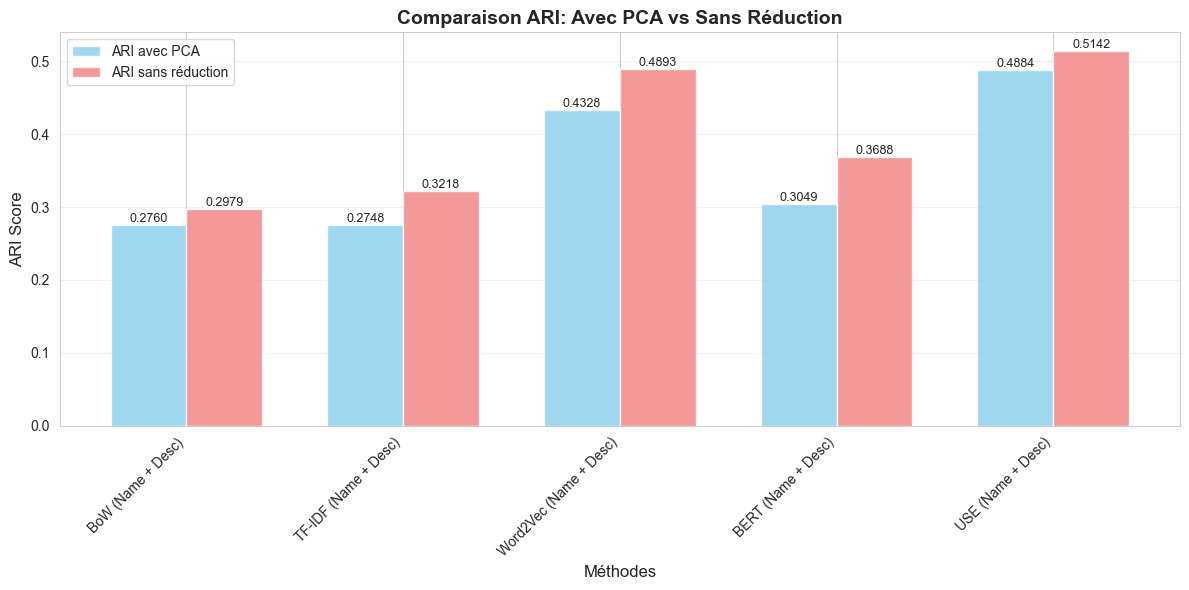


🎯 CONCLUSIONS:
   • Meilleur ARI (avec PCA):      USE (Name + Desc) (0.4884)
   • Meilleur ARI (sans réduction): USE (Name + Desc) (0.5142)


In [56]:
# Charger les catégories vraies (supposé que vous avez categories_1050)
true_labels = categories # ou la variable contenant vos vraies catégories
# 
# # Lancer l'évaluation complète
results_pca, results_no_pca, comparison_df = run_complete_evaluation(
    features_dict=features_dict,
    true_labels=true_labels,
    n_clusters=7,
    pca_components=50
)

# Sauvegarder les résultats
results_pca.to_csv("../data/text_features/results/clustering_evaluation_with_pca.csv", index=False)
results_no_pca.to_csv("../data/text_features/results/clustering_evaluation_no_reduction.csv", index=False)

# Images Data

## Images Analyzing

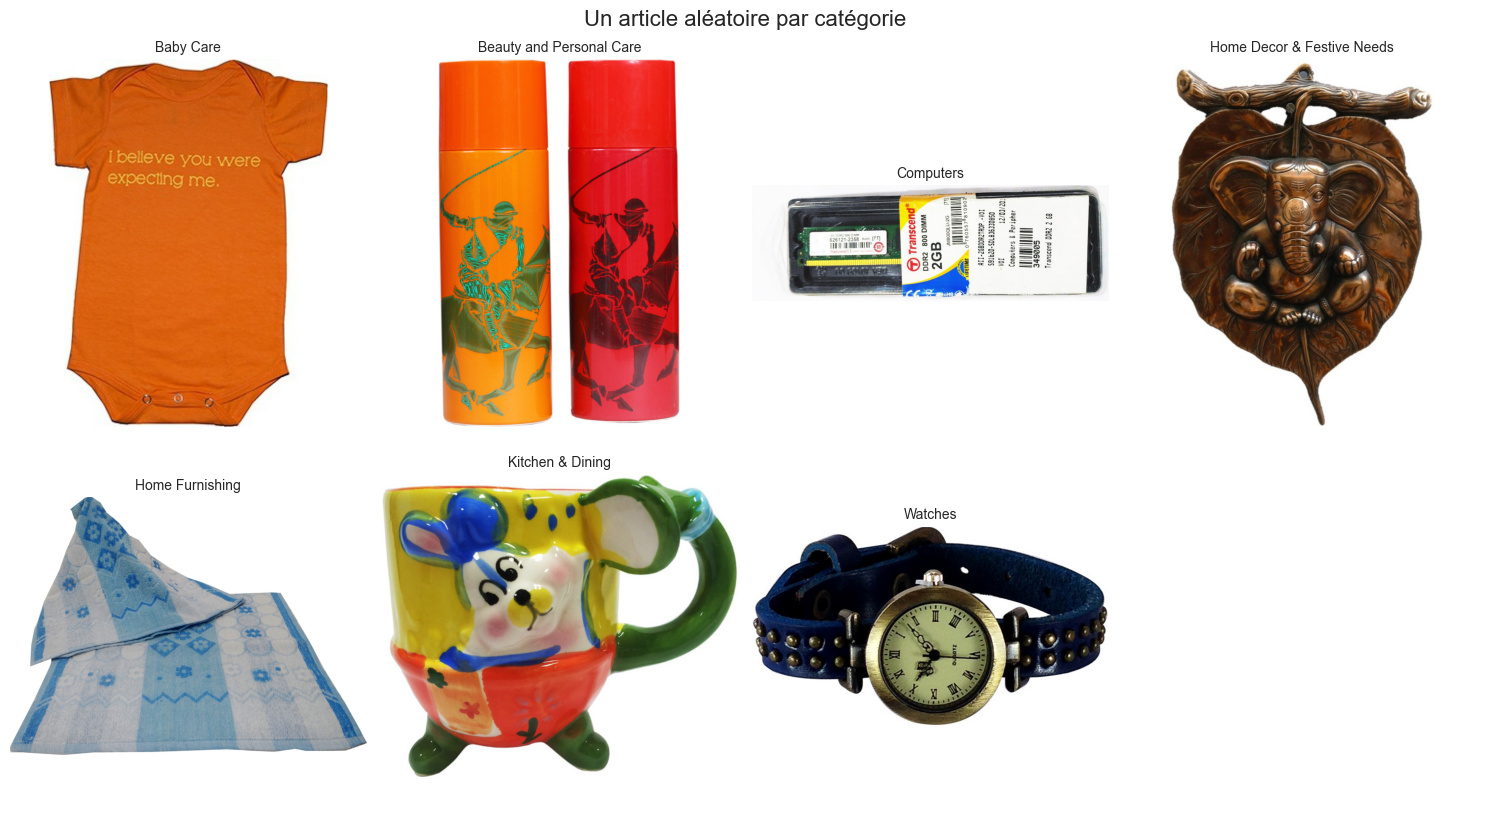

In [29]:
# Get one random sample per category from the balanced dataframe
sampled_products = df.groupby('category').sample(1, random_state=13)

# Sort categories alphabetically for consistent plot order
sampled_products = sampled_products.sort_values('category')

# Create the plot
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten() # Flatten the 2x4 grid into a 1D array of axes

for i, (index, row) in enumerate(sampled_products.iterrows()):
    image_path = row['image_path']
    category = row['category']

    try:
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].set_title(category, fontsize=10)
        axes[i].axis('off')
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
        axes[i].set_title(f"Image Error: {category}", fontsize=10)
        axes[i].axis('off')
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        axes[i].set_title(f"Image Error: {category}", fontsize=10)
        axes[i].axis('off')


# Hide the last empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.suptitle('Un article aléatoire par catégorie', y=1.02, fontsize=16)
plt.show()


ANALYSE EXPLORATOIRE DES IMAGES
Nombre total d'images: 1050
Nombre de catégories: 7
Catégories: Home Furnishing, Baby Care, Watches, Home Decor & Festive Needs, Kitchen & Dining, Beauty and Personal Care, Computers

STATISTIQUES D'IMAGES (sur 100 images analysées):
Largeur moyenne: 1379.5 pixels
Hauteur moyenne: 1402.2 pixels
Taille moyenne: 443.2 KB
Modes les plus fréquents: RGB    100
Name: count, dtype: int64


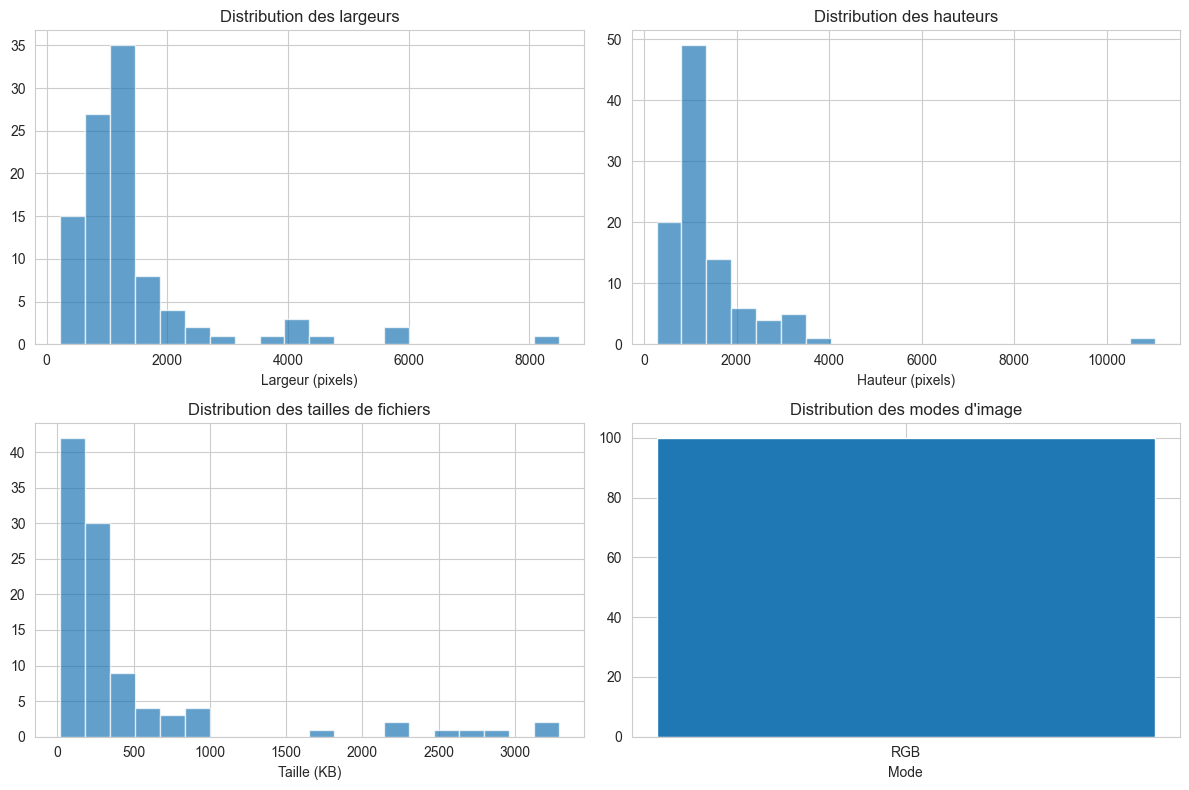

{'widths': [400,
  776,
  1966,
  273,
  1257,
  946,
  879,
  1100,
  1209,
  979,
  452,
  1100,
  1100,
  370,
  962,
  1994,
  1488,
  1100,
  4140,
  1100,
  2800,
  1080,
  1040,
  1100,
  569,
  719,
  992,
  1201,
  646,
  1100,
  1100,
  1280,
  850,
  839,
  880,
  2400,
  334,
  908,
  1553,
  1021,
  1010,
  1100,
  8484,
  1100,
  1100,
  1100,
  1478,
  423,
  900,
  815,
  1100,
  682,
  223,
  1100,
  1100,
  1892,
  344,
  962,
  888,
  5855,
  2356,
  1296,
  653,
  1100,
  1948,
  4174,
  1088,
  3557,
  1024,
  450,
  1039,
  1100,
  674,
  788,
  1068,
  408,
  1100,
  1100,
  1590,
  1100,
  763,
  545,
  1170,
  6000,
  1767,
  586,
  1100,
  1484,
  776,
  1100,
  4433,
  4120,
  1100,
  1255,
  490,
  537,
  1689,
  1078,
  1100,
  1588],
 'heights': [357,
  1380,
  1475,
  497,
  2049,
  1000,
  1100,
  510,
  1417,
  1100,
  955,
  1045,
  1006,
  1100,
  1100,
  2033,
  1224,
  509,
  3000,
  1245,
  1488,
  1100,
  771,
  994,
  1000,
  1100,
  1242,
  539,

In [30]:
def analyze_image_dataset(df, image_dir, sample_size=100):
    """
    Analyse exploratoire du dataset d'images
    
    Args:
        df: DataFrame avec les informations des produits
        image_dir: Répertoire contenant les images
        sample_size: Nombre d'images à analyser pour les statistiques
    """
    print("="*60)
    print("ANALYSE EXPLORATOIRE DES IMAGES")
    print("="*60)
    
    # Statistiques générales
    total_images = len(df)
    categories = df['category'].unique()
    
    print(f"Nombre total d'images: {total_images}")
    print(f"Nombre de catégories: {len(categories)}")
    print(f"Catégories: {', '.join(categories)}")
    
    # Analyse d'un échantillon d'images
    sample_df = df.sample(n=min(sample_size, len(df)), random_state=42)
    
    image_stats = {
        'widths': [],
        'heights': [],
        'modes': [],
        'file_sizes': []
    }
    
    successful_loads = 0
    
    for idx, row in sample_df.iterrows():
        image_path = os.path.join(image_dir, row['image'])
        try:
            with Image.open(image_path) as img:
                image_stats['widths'].append(img.width)
                image_stats['heights'].append(img.height)
                image_stats['modes'].append(img.mode)
                image_stats['file_sizes'].append(os.path.getsize(image_path))
                successful_loads += 1
        except Exception as e:
            print(f"Erreur lors du chargement de {image_path}: {e}")
    
    if successful_loads > 0:
        print(f"\nSTATISTIQUES D'IMAGES (sur {successful_loads} images analysées):")
        print(f"Largeur moyenne: {np.mean(image_stats['widths']):.1f} pixels")
        print(f"Hauteur moyenne: {np.mean(image_stats['heights']):.1f} pixels")
        print(f"Taille moyenne: {np.mean(image_stats['file_sizes'])/1024:.1f} KB")
        print(f"Modes les plus fréquents: {pd.Series(image_stats['modes']).value_counts().head()}")
        
        # Visualisation des distributions
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        
        axes[0,0].hist(image_stats['widths'], bins=20, alpha=0.7)
        axes[0,0].set_title('Distribution des largeurs')
        axes[0,0].set_xlabel('Largeur (pixels)')
        
        axes[0,1].hist(image_stats['heights'], bins=20, alpha=0.7)
        axes[0,1].set_title('Distribution des hauteurs')
        axes[0,1].set_xlabel('Hauteur (pixels)')
        
        axes[1,0].hist([size/1024 for size in image_stats['file_sizes']], bins=20, alpha=0.7)
        axes[1,0].set_title('Distribution des tailles de fichiers')
        axes[1,0].set_xlabel('Taille (KB)')
        
        mode_counts = pd.Series(image_stats['modes']).value_counts()
        axes[1,1].bar(mode_counts.index, mode_counts.values)
        axes[1,1].set_title('Distribution des modes d\'image')
        axes[1,1].set_xlabel('Mode')
        
        plt.tight_layout()
        plt.show()
    
    return image_stats

image_stats = analyze_image_dataset(df, image_dir)
image_stats

## Images Data treatement

étapes de base à faire:

Autoncontrast

- Autocontrast
- Equalization
- to RGB
- boxblur

ce que je vais faire:

2. Prétraitement des images

- Conversion en RGB
- Améliorations optionnelles (contraste, couleur, flou anti-bruit)

- Redimensionnement standardisé (256x256)


In [31]:
def preprocess_image(image_path, target_size=(256, 256), enhance=True):
    """
    Prétraitement d'une image individuelle
    
    Args:
        image_path: Chemin vers l'image
        target_size: Taille cible (hauteur, largeur)
        enhance: Appliquer des améliorations d'image
    
    Returns:
        image: Image prétraitée sous forme d'array numpy
    """
    try:
        # Charger l'image
        img = Image.open(image_path)
        
        # Conversion en RGB si nécessaire
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Améliorations optionnelles
        if enhance:
            # Auto-contraste
            img = ImageEnhance.Contrast(img).enhance(1.0)
            # Égalisation légère
            img = ImageEnhance.Color(img).enhance(1.0)
            # Léger flou pour réduire le bruit
            img = img.filter(ImageFilter.BoxBlur(0.7))
        
        # Redimensionnement
        img = img.resize(target_size)
        
        # Conversion en array numpy
        img_array = np.array(img)
        
        return img_array
        
    except Exception as e:
        print(f"Erreur lors du prétraitement de {image_path}: {e}")
        # Retourner une image noire en cas d'erreur
        return np.zeros((target_size[0], target_size[1], 3), dtype=np.uint8)
    

def batch_preprocess_images(df, image_dir, target_size=(256, 256), enhance=True):
    """
    Prétraitement par lots de toutes les images
    
    Args:
        df: DataFrame avec les informations des produits
        image_dir: Répertoire contenant les images
        target_size: Taille cible pour toutes les images
        enhance: Appliquer des améliorations
    
    Returns:
        processed_images: Array numpy des images prétraitées
        valid_indices: Indices des images valides
    """
    print(f"Prétraitement de {len(df)} images...")
    
    processed_images = []
    valid_indices = []
    
    for idx, row in df.iterrows():
        image_path = os.path.join(image_dir, row['image'])
        
        processed_img = preprocess_image(image_path, target_size, enhance)
        
        # Vérifier si l'image n'est pas complètement noire (erreur)
        if processed_img.sum() > 0:
            processed_images.append(processed_img)
            valid_indices.append(idx)
        
        if len(processed_images) % 100 == 0:
            print(f"Traité {len(processed_images)} images...")
    
    processed_images = np.array(processed_images)
    print(f"Prétraitement terminé: {len(processed_images)} images valides")
    
    return processed_images, valid_indices




In [32]:
if os.path.exists(image_dir):
    # Option 1: Traiter toutes les images
    print("\n" + "="*60)
    print("OPTION 1: TRAITEMENT COMPLET")
    print("="*60)
    
    processed_images, valid_indices = batch_preprocess_images(
        df=df, 
        image_dir=image_dir,
        target_size=(256, 256),  # Taille standard pour les CNN
        enhance=True  # Appliquer les améliorations
    )
    
    # Créer un DataFrame avec seulement les images valides
    valid_df = df.iloc[valid_indices].reset_index(drop=True)
    categories = valid_df['category'].values
    
    print(f"\n📊 RÉSUMÉ:")
    print(f"Images prétraitées: {processed_images.shape}")
    print(f"Distribution par catégorie:")
    print(valid_df['category'].value_counts())


OPTION 1: TRAITEMENT COMPLET
Prétraitement de 1050 images...
Traité 100 images...
Traité 200 images...
Traité 300 images...
Traité 400 images...
Traité 500 images...
Traité 600 images...
Traité 700 images...
Traité 800 images...
Traité 900 images...
Traité 1000 images...
Prétraitement terminé: 1050 images valides

📊 RÉSUMÉ:
Images prétraitées: (1050, 256, 256, 3)
Distribution par catégorie:
category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64


## **Images Data features

In [33]:
features_images = {}

### **SIFT

In [58]:
#                                     max_features=800, 
#                                     contrast_threshold=0.01,
#                                     edge_threshold=8,
#                                     sigma=1.6,
#                                     aggregation_method='mean',
#                                     n_clusters_bow=200)

def extract_sift_features(images, max_features=800, 
                                    contrast_threshold=0.01,
                                    edge_threshold=8,
                                    sigma=1.6,
                                    aggregation_method='mean',
                                    n_clusters_bow=200):
    """
    Version optimisée de l'extraction SIFT avec plusieurs améliorations
    
    Args:
        images: Array d'images prétraitées
        max_features: Nombre max de keypoints par image (augmenté)
        contrast_threshold: Seuil de contraste pour filtrer les keypoints faibles
        edge_threshold: Seuil pour éliminer les points de contour
        sigma: Écart-type du flou gaussien initial
        aggregation_method: 'mean', 'bow', 'vlad', 'max_pool'
        n_clusters_bow: Nombre de clusters pour BoW/VLAD
    
    Returns:
        features: Features SIFT optimisées
    """
    print(f"Extraction SIFT optimisée (méthode: {aggregation_method})...")
    
    # Initialiser SIFT avec paramètres optimisés
    sift = cv2.SIFT_create(
        nfeatures=max_features,
        contrastThreshold=contrast_threshold,
        edgeThreshold=edge_threshold,
        sigma=sigma
    )
    
    # Collecter tous les descripteurs pour BoW/VLAD
    all_descriptors = []
    image_descriptors = []
    
    # 1. Extraction des descripteurs
    for i, img in enumerate(images):
        # Préprocessing amélioré de l'image
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
        # Amélioration du contraste local (CLAHE)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        gray = clahe.apply(gray)
        
        # Extraction SIFT
        keypoints, descriptors = sift.detectAndCompute(gray, None)
        
        if descriptors is not None and len(descriptors) > 0:
            # Normalisation L2 des descripteurs
            descriptors = descriptors.astype(np.float32)
            descriptors = descriptors / (np.linalg.norm(descriptors, axis=1, keepdims=True) + 1e-7)
            
            all_descriptors.append(descriptors)
            image_descriptors.append(descriptors)
        else:
            image_descriptors.append(np.array([]).reshape(0, 128))
        
        if (i + 1) % 100 == 0:
            print(f"Extraction: {i + 1}/{len(images)} images")
    
    # 2. Agrégation selon la méthode choisie
    if aggregation_method == 'mean':
        # Méthode moyenne simple (améliorée)
        features = []
        for descriptors in image_descriptors:
            if len(descriptors) > 0:
                # Moyenne pondérée par l'importance des descripteurs
                weights = np.linalg.norm(descriptors, axis=1)
                weights = weights / (np.sum(weights) + 1e-7)
                avg_descriptor = np.average(descriptors, axis=0, weights=weights)
                features.append(avg_descriptor)
            else:
                features.append(np.zeros(128))
        features = np.array(features)
    
    elif aggregation_method == 'bow':
        # Bag of Visual Words
        print("Construction du vocabulaire BoW...")
        all_desc_concat = np.vstack([desc for desc in all_descriptors if len(desc) > 0])
        
        # K-means pour créer le vocabulaire
        kmeans = KMeans(n_clusters=n_clusters_bow, random_state=42, n_init=10)
        kmeans.fit(all_desc_concat)
        
        # Construire l'histogramme BoW pour chaque image
        features = []
        for descriptors in image_descriptors:
            if len(descriptors) > 0:
                # Assigner chaque descripteur au cluster le plus proche
                labels = kmeans.predict(descriptors)
                # Créer l'histogramme normalisé
                hist, _ = np.histogram(labels, bins=n_clusters_bow, range=(0, n_clusters_bow))
                hist = hist.astype(np.float32)
                # Normalisation TF-IDF simple
                hist = hist / (np.sum(hist) + 1e-7)
                features.append(hist)
            else:
                features.append(np.zeros(n_clusters_bow))
        features = np.array(features)
    
    elif aggregation_method == 'vlad':
        # Vector of Locally Aggregated Descriptors
        print("Construction VLAD...")
        all_desc_concat = np.vstack([desc for desc in all_descriptors if len(desc) > 0])
        
        # K-means pour les centres VLAD
        kmeans = KMeans(n_clusters=n_clusters_bow, random_state=42, n_init=10)
        kmeans.fit(all_desc_concat)
        centers = kmeans.cluster_centers_
        
        features = []
        for descriptors in image_descriptors:
            if len(descriptors) > 0:
                # VLAD encoding
                labels = kmeans.predict(descriptors)
                vlad_vector = np.zeros((n_clusters_bow, 128))
                
                for i in range(n_clusters_bow):
                    mask = labels == i
                    if np.any(mask):
                        residuals = descriptors[mask] - centers[i]
                        vlad_vector[i] = np.sum(residuals, axis=0)
                
                # Normalisation intra et L2
                vlad_vector = vlad_vector.flatten()
                # Power normalization
                vlad_vector = np.sign(vlad_vector) * np.sqrt(np.abs(vlad_vector))
                # L2 normalization
                vlad_vector = vlad_vector / (np.linalg.norm(vlad_vector) + 1e-7)
                features.append(vlad_vector)
            else:
                features.append(np.zeros(n_clusters_bow * 128))
        features = np.array(features)
    
    elif aggregation_method == 'max_pool':
        # Max pooling des descripteurs
        features = []
        for descriptors in image_descriptors:
            if len(descriptors) > 0:
                max_pooled = np.max(descriptors, axis=0)
                features.append(max_pooled)
            else:
                features.append(np.zeros(128))
        features = np.array(features)
    
    print(f"Features SIFT optimisées: {features.shape}")
    return features



sift_features = extract_sift_features(processed_images)
features_images['SIFT'] = sift_features
pd.DataFrame(sift_features).to_csv("../data/image_features/SIFT/sift_features.csv", index=False)

Extraction SIFT optimisée (méthode: mean)...
Extraction: 100/1050 images
Extraction: 200/1050 images
Extraction: 300/1050 images
Extraction: 400/1050 images
Extraction: 500/1050 images
Extraction: 600/1050 images
Extraction: 700/1050 images
Extraction: 800/1050 images
Extraction: 900/1050 images
Extraction: 1000/1050 images
Features SIFT optimisées: (1050, 128)


### **VGG16

In [35]:
def extract_vgg16_features(images, batch_size=32):
    """
    Extraction de features avec VGG16 pré-entraîné
    
    Args:
        images: Array d'images prétraitées
        batch_size: Taille des lots pour le traitement
    
    Returns:
        features: Features VGG16
    """
    print("Chargement du modèle VGG16...")
    
    base_model = VGG16(weights='imagenet', include_top=False)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)
    x = GlobalMaxPooling2D()(model.output)
    model = Model(inputs=model.input, outputs=x)

    # Charger VGG16 sans les couches de classification
    #model = VGG16(weights='imagenet', include_top=False, pooling='max')
    
    print("Extraction des features VGG16...")
    
    features = []
    
    # Traitement par lots
    for i in range(0, len(images), batch_size):
        batch = images[i:i+batch_size]
        
        # Préprocessing spécifique à VGG16
        batch_preprocessed = vgg16_preprocess(batch.astype(np.float32))
        
        # Extraction des features
        batch_features = model.predict(batch_preprocessed, verbose=0)
        features.extend(batch_features)
        
        print(f"VGG16: {min(i + batch_size, len(images))}/{len(images)} images traitées")
    
    features = np.array(features)
    print(f"Features VGG16 extraites: {features.shape}")
    
    return features


vgg16_features = extract_vgg16_features(processed_images)
features_images['VGG16'] = vgg16_features
pd.DataFrame(vgg16_features).to_csv(os.path.join("../data/image_features/VGG16/vgg16_features.csv"), index=False)

Chargement du modèle VGG16...
Extraction des features VGG16...
VGG16: 32/1050 images traitées
VGG16: 64/1050 images traitées
VGG16: 96/1050 images traitées
VGG16: 128/1050 images traitées
VGG16: 160/1050 images traitées
VGG16: 192/1050 images traitées
VGG16: 224/1050 images traitées
VGG16: 256/1050 images traitées
VGG16: 288/1050 images traitées
VGG16: 320/1050 images traitées
VGG16: 352/1050 images traitées
VGG16: 384/1050 images traitées
VGG16: 416/1050 images traitées
VGG16: 448/1050 images traitées
VGG16: 480/1050 images traitées
VGG16: 512/1050 images traitées
VGG16: 544/1050 images traitées
VGG16: 576/1050 images traitées
VGG16: 608/1050 images traitées
VGG16: 640/1050 images traitées
VGG16: 672/1050 images traitées
VGG16: 704/1050 images traitées
VGG16: 736/1050 images traitées
VGG16: 768/1050 images traitées
VGG16: 800/1050 images traitées
VGG16: 832/1050 images traitées
VGG16: 864/1050 images traitées
VGG16: 896/1050 images traitées
VGG16: 928/1050 images traitées
VGG16: 960/1

In [36]:
# Analyser la structure du modèle VGG16
model = VGG16(weights='imagenet', include_top=False, pooling='avg')
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
print(features_images.keys())

dict_keys(['SIFT', 'VGG16'])


## **Images Data features visualisation

Visualisation t-SNE des features d'images...

Traitement t-SNE pour SIFT...
 Réduction PCA: 128 → 50 dimensions

Traitement t-SNE pour VGG16...
 Réduction PCA: 512 → 50 dimensions


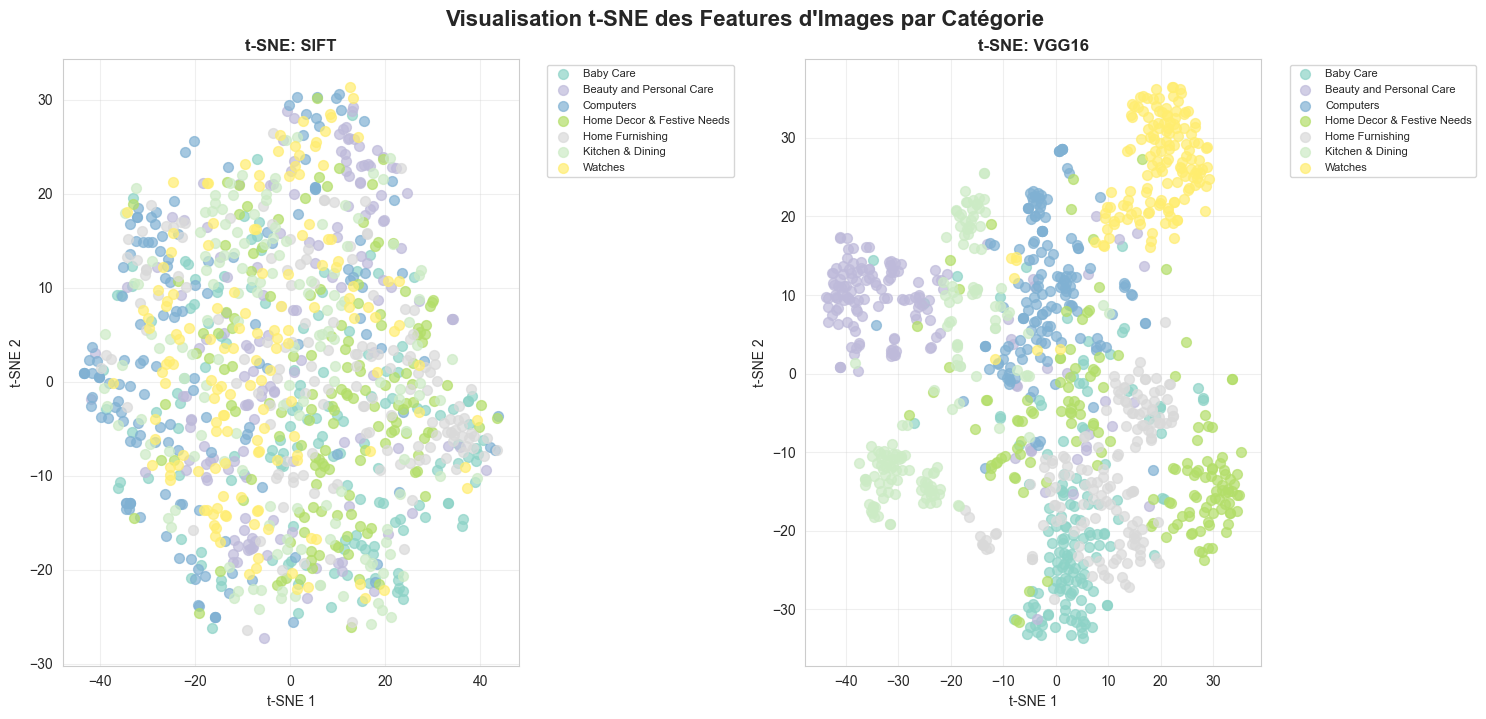

In [38]:
def visualize_image_features_tsne(features_dict, categories, save_path=None):
    """
    Visualisation t-SNE des features d'images
    
    Args:
        features_dict: Dictionnaire {nom_méthode: features}
        categories: Array des catégories vraies
        save_path: Chemin pour sauvegarder les graphiques
    """
    print("Visualisation t-SNE des features d'images...")
    
    # Configuration des couleurs
    unique_categories = np.unique(categories)
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_categories)))
    category_colors = {cat: colors[i] for i, cat in enumerate(unique_categories)}
    
    # Calculer le nombre de sous-graphiques
    n_features = len(features_dict)
    n_cols = 2
    n_rows = (n_features + n_cols - 1) // n_cols
    
    # Créer la figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 7*n_rows))
    if n_features == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    tsne_results = {}
    
    for idx, (feature_name, features) in enumerate(features_dict.items()):
        print(f"\nTraitement t-SNE pour {feature_name}...")
        
        # Normalisation des features
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features)
        
        # Réduction PCA préalable si nécessaire
        if features_scaled.shape[1] > 50:
            print(f" Réduction PCA: {features_scaled.shape[1]} → 50 dimensions")
            pca = PCA(n_components=50, random_state=42)
            features_scaled = pca.fit_transform(features_scaled)
        
        # Application de t-SNE
        tsne = TSNE(
            n_components=2,
            random_state=42,
            perplexity=min(30, len(features_scaled)//4),
            max_iter=1000
        )
        
        tsne_result = tsne.fit_transform(features_scaled)
        tsne_results[feature_name] = tsne_result
        
        # Créer le graphique
        ax = axes[idx]
        
        for category in unique_categories:
            mask = categories == category
            if np.any(mask):
                ax.scatter(
                    tsne_result[mask, 0],
                    tsne_result[mask, 1],
                    c=[category_colors[category]],
                    label=category,
                    alpha=0.7,
                    s=50
                )
        
        ax.set_title(f't-SNE: {feature_name}', fontsize=12, fontweight='bold')
        ax.set_xlabel('t-SNE 1')
        ax.set_ylabel('t-SNE 2')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        ax.grid(True, alpha=0.3)
    
    # Cacher les axes inutilisés
    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Visualisation t-SNE des Features d\'Images par Catégorie', 
                 fontsize=16, fontweight='bold', y=1.02)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return tsne_results


tsne_results = visualize_image_features_tsne(
        features_images, 
        categories, 
        save_path=os.path.join("../data/image_features", "tsne_visualization.png")
)

## **Evaluate Images features

### **With PCA

In [59]:
def evaluate_image_clustering(features_dict, true_labels, 
                             n_clusters=7, 
                             pca_components=50, random_state=42, 
                             verbose=True):
    """
    Évaluation du clustering avec réduction PCA
    
    Args:
        features_dict: Dictionnaire des features
        true_labels: Vraies étiquettes
        n_clusters: Nombre de clusters
        pca_components: Composantes PCA
        random_state: Graine aléatoire
        verbose: Affichage détaillé
    
    Returns:
        DataFrame des résultats
    """
    results = []
    
    if verbose:
        print("="*60)
        print("ÉVALUATION CLUSTERING IMAGES (AVEC PCA)")
        print("="*60)
    
    for method_name, features in features_dict.items():
        if verbose:
            print(f"\nTraitement: {method_name}")
            print(f"Dimensions originales: {features.shape}")
        
        try:
            # Standardisation
            scaler = StandardScaler()
            features_scaled = scaler.fit_transform(features)
            
            # Réduction PCA si nécessaire
            if features_scaled.shape[1] > pca_components:
                if verbose:
                    print(f" → Réduction PCA: {features_scaled.shape[1]} → {pca_components}")
                pca = PCA(n_components=pca_components, random_state=random_state)
                features_final = pca.fit_transform(features_scaled)
                variance_explained = pca.explained_variance_ratio_.sum()
            else:
                if verbose:
                    print(f" → Pas de réduction nécessaire")
                features_final = features_scaled
                variance_explained = 1.0
            
            # Clustering K-means
            kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
            cluster_labels = kmeans.fit_predict(features_final)
            
            # Métriques - ONLY ARI
            ari_score = adjusted_rand_score(true_labels, cluster_labels)
            
            result = {
                'Method': method_name,
                'Original_Dims': features.shape[1],
                'Final_Dims': features_final.shape[1],
                'Variance_Explained': variance_explained,
                'ARI_Score': ari_score,
                'Inertia': kmeans.inertia_
            }
            results.append(result)
            
            if verbose:
                print(f" ✓ ARI: {ari_score:.4f}")
                print(f" Variance expliquée: {variance_explained:.1%}")
        
        except Exception as e:
            if verbose:
                print(f" ✗ Erreur: {e}")
            
            result = {
                'Method': method_name,
                'Original_Dims': features.shape[1] if hasattr(features, 'shape') else 'Error',
                'Final_Dims': 'Error',
                'Variance_Explained': 'Error',
                'ARI_Score': np.nan,
                'Inertia': np.nan
            }
            results.append(result)
    
    return pd.DataFrame(results)

results_pca = evaluate_image_clustering(
    features_images, 
    categories, 
    n_clusters=len(np.unique(categories))
)

ÉVALUATION CLUSTERING IMAGES (AVEC PCA)

Traitement: SIFT
Dimensions originales: (1050, 128)
 → Réduction PCA: 128 → 50
 ✓ ARI: 0.0605
 Variance expliquée: 98.3%

Traitement: VGG16
Dimensions originales: (1050, 512)
 → Réduction PCA: 512 → 50
 ✓ ARI: 0.4122
 Variance expliquée: 60.0%


### **Without PCA

In [60]:
def evaluate_image_clustering_no_reduction(features_dict, true_labels, n_clusters=7, 
                                         random_state=42, verbose=True):
    """
    Évaluation du clustering sans réduction dimensionnelle
    """
    results = []
    
    if verbose:
        print("="*60)
        print("ÉVALUATION CLUSTERING IMAGES (SANS RÉDUCTION)")
        print("="*60)
    
    for method_name, features in features_dict.items():
        if verbose:
            print(f"\nTraitement: {method_name}")
            print(f"Dimensions: {features.shape}")
        
        try:
            # Standardisation
            scaler = StandardScaler()
            features_scaled = scaler.fit_transform(features)
            
            # Clustering direct
            kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
            cluster_labels = kmeans.fit_predict(features_scaled)
            
            # Métriques - ONLY ARI
            ari_score = adjusted_rand_score(true_labels, cluster_labels)
            
            result = {
                'Method': method_name,
                'Dimensions': features.shape[1],
                'ARI_Score': ari_score,
                'Inertia': kmeans.inertia_
            }
            results.append(result)
            
            if verbose:
                print(f" ✓ ARI: {ari_score:.4f}")
        
        except Exception as e:
            if verbose:
                print(f" ✗ Erreur: {e}")
            
            result = {
                'Method': method_name,
                'Dimensions': features.shape[1] if hasattr(features, 'shape') else 'Error',
                'ARI_Score': np.nan,
                'Inertia': np.nan
            }
            results.append(result)
    
    return pd.DataFrame(results)

results_no_pca = evaluate_image_clustering_no_reduction(
    features_images, 
    categories, 
    n_clusters=len(np.unique(categories))
)

ÉVALUATION CLUSTERING IMAGES (SANS RÉDUCTION)

Traitement: SIFT
Dimensions: (1050, 128)
 ✓ ARI: 0.0560

Traitement: VGG16
Dimensions: (1050, 512)
 ✓ ARI: 0.4162


### **Comparison


6. COMPARAISON DES RÉSULTATS

COMPARAISON DES RÉSULTATS DE CLUSTERING


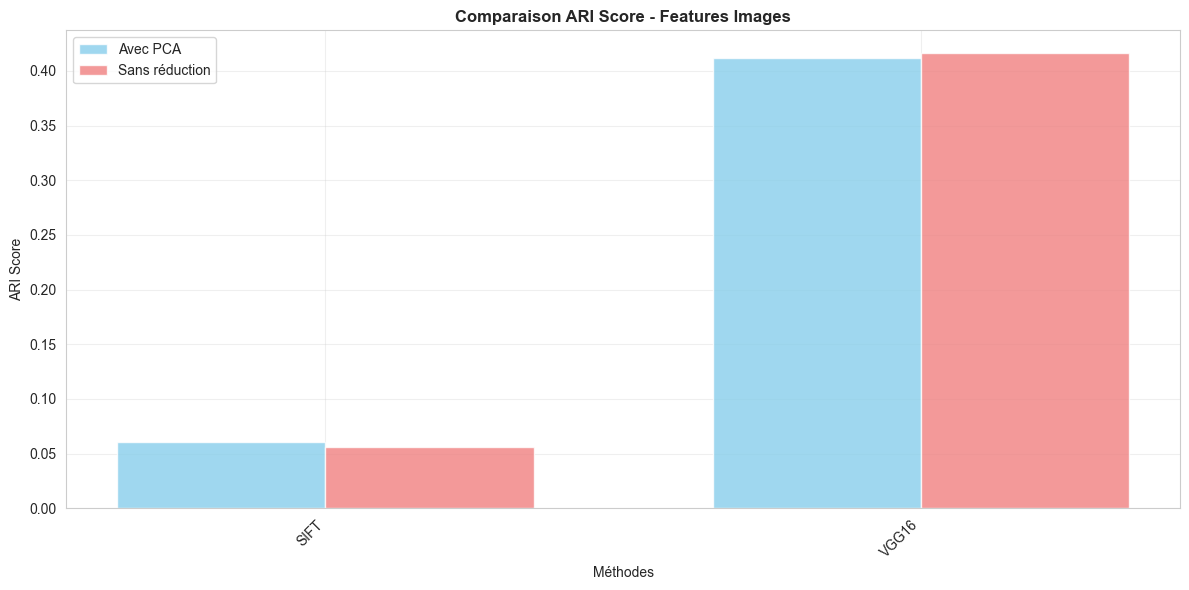


TABLEAU COMPARATIF:
  Method  Original_Dims  ARI_with_PCA  ARI_no_reduction
0   SIFT            128        0.0605            0.0560
1  VGG16            512        0.4122            0.4162


In [61]:
def compare_clustering_results(results_pca, results_no_pca):
    """
    Compare et visualise les résultats de clustering - ARI seulement
    """
    print("\n" + "="*80)
    print("COMPARAISON DES RÉSULTATS DE CLUSTERING")
    print("="*80)
    
    # Créer le graphique de comparaison - ARI SEULEMENT
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    methods = results_pca['Method'].tolist()
    x_pos = np.arange(len(methods))
    width = 0.35
    
    # Comparaison ARI uniquement
    ax.bar(x_pos - width/2, results_pca['ARI_Score'], width, 
           label='Avec PCA', alpha=0.8, color='skyblue')
    ax.bar(x_pos + width/2, results_no_pca['ARI_Score'], width, 
           label='Sans réduction', alpha=0.8, color='lightcoral')
    
    ax.set_title('Comparaison ARI Score - Features Images', fontweight='bold')
    ax.set_xlabel('Méthodes')
    ax.set_ylabel('ARI Score')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(methods, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Tableau de comparaison - ARI seulement
    comparison_df = pd.DataFrame({
        'Method': results_pca['Method'],
        'Original_Dims': results_pca['Original_Dims'],
        'ARI_with_PCA': results_pca['ARI_Score'],
        'ARI_no_reduction': results_no_pca['ARI_Score']
    })
    
    print("\nTABLEAU COMPARATIF:")
    print(comparison_df.round(4))
    
    return comparison_df

print("\n6. COMPARAISON DES RÉSULTATS")
comparison_df = compare_clustering_results(results_pca, results_no_pca)

# Sauvegarde des résultats
results_pca.to_csv(os.path.join("../data/image_features", "results", 
                                "clustering_with_pca.csv"), index=False)
results_no_pca.to_csv(os.path.join("../data/image_features", "results", 
                                  "clustering_no_reduction.csv"), index=False)
comparison_df.to_csv(os.path.join("../data/image_features", "results",
                                 "clustering_comparison.csv"), index=False)


# End